<a href="https://colab.research.google.com/github/stvngo/Algoverse-AI-Model-Probing/blob/main/Taiwo_Omoya_Linear_Probing_Qwen_3_0_6B_pts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

When a model makes a correct prediction on a task it has been trained on, Probing classifeier can be used to identify if the model actually contains the relevant informatioin or knowledge required to make that prediction, or it is just making a lucky guess
- can be used to identify crucial insights for developing better models over time


### How it works

A nn takes it's input as a series of vectors, or representations, and transform them through a series of layers to produce an output
- develop representations that useful so that the final few layers of the network can be a good prediction

### Probes
- a features or representations from the model are easily seperable by a simple classifier ==> a probe
The only way the probe can perform well on this task is if the representation it is given are already good enough to make the prediction



## Version Control: GitHub Setup(Click to expand)
### **Run this GitHub setup cell every session
--> meant to be ran all at once at the beginning of each session

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

#git config
!git config --global user.name "Taiwo Omoya"
!git config --global user.email "taiwoomoya272@gmail.com"

# Clone the repo
from getpass import getpass
token = getpass("Enter your GitHub token: ")
repo_url = f"https://{token}@github.com/stvngo/Algoverse-AI-Model-Probing.git"

!git clone {repo_url}
%cd Algoverse-AI-Model-Probing

Mounted at /content/drive
Enter your GitHub token: ··········
Cloning into 'Algoverse-AI-Model-Probing'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 128 (delta 72), reused 10 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (128/128), 5.28 MiB | 4.47 MiB/s, done.
Resolving deltas: 100% (72/72), done.
/content/Algoverse-AI-Model-Probing


### Confirm notebook/code is on GitHub before changing anything

### Push the changes made onto GitHub




In [10]:
!git add .
!git commit -m "Correct Commit Message: Code that generates the activations on-the-fly, now moving on to using the cached activation that Steven provided"
!git push origin main

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
Everything up-to-date


In [16]:
# Make sure you're in the repo folder
!pwd

# See what files are tracked by git in this folder
!git ls-files

# Check the last commit log to confirm your commit is there
!git log -1

/content/Algoverse-AI-Model-Probing
(Cached_Activations)_Dylan_Qwen3_0_6B_pts_LinearProbe.ipynb
Dylan_Qwen3_0_6B_pts_LinearProbe.ipynb
Linear_Probing_Classifier_Example.ipynb
Linear_Probing_Qwen_3_0_6B.ipynb
Output_Replication_Qwen_3_0_6B.ipynb
README.md
Steven_Qwen_PTS_Linear_Probing_Prototype.ipynb
Taiwo_Linear_Probing_Qwen_3_0_6B.ipynb
Taiwo_Omoya_Linear_Probing_Qwen_3_0_6B.ipynb
Zurabi_Layerwise_Probing_Qwen3_0_6B.ipynb
data_preprocessing.ipynb
fixed_Taiwo_Omoya_Linear_Probing_Qwen_3_0.6B.ipynb
commit 5bd19a66af07e258213685d4ab7168b4eaa2f041 (HEAD -> main, origin/main, origin/HEAD)
Author: Steven Ngo <svinhngo@gmail.com>
Date:   Wed Aug 6 04:33:13 2025 -0700

    Implemented metric analysis, including confusion matrices, f1, auroc, fp/fn ratio, tp/tn/fp/fn extraction, and visualization of error behaviors over layers


In [12]:
# 1️⃣ Check last local commit
!git log -1 --oneline

# 2️⃣ Check if local and remote are in sync
!git fetch origin
!git status


5bd19a6 (HEAD -> main, origin/main, origin/HEAD) Implemented metric analysis, including confusion matrices, f1, auroc, fp/fn ratio, tp/tn/fp/fn extraction, and visualization of error behaviors over layers
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


## Code for fixing the widget error(commented out)

In [ ]:
#!ls /content/drive/MyDrive/*.ipynb

In [ ]:
'''import nbformat

notebook_path = "/content/drive/MyDrive/Taiwo_Omoya_Linear_Probing: Qwen_3_0.6B .ipynb"

# Read the notebook
nb = nbformat.read(notebook_path, as_version=4)

# Remove the broken widget metadata if it exists
if 'widgets' in nb['metadata']:
    nb['metadata'].pop('widgets')

# 🔧 Change the cleaned file name here
cleaned_path = "/content/fixed_Taiwo_Omoya_Linear_Probing_Qwen_3_0.6B.ipynb"

# Save the cleaned version
with open(cleaned_path, "w") as f:
    nbformat.write(nb, f)

print(f"Cleaned notebook saved at: {cleaned_path}")
'''


In [ ]:
'''!ls /content/'''

In [ ]:
'''!cp "/content/fixed_Taiwo_Omoya_Linear_Probing_Qwen_3_0.6B.ipynb" /content/Algoverse-AI-Model-Probing/
%cd /content/Algoverse-AI-Model-Probing
!git add fixed_Taiwo_Omoya_Linear_Probing_Qwen_3_0.6B.ipynb
!git commit -m "Add cleaned notebook version"
!git push
'''

## Installing


In [1]:
# Install and load the model
!pip install transformers accelerate



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

## Imports and Setup


In [3]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_from_disk
from tqdm import tqdm

## Load the Processed Dataset: Using the shared dataset generated with Fourth Method (balanced 1:1 labels per query)

### Run the cell after it before running this cell
--> more of precaution to check whether google drive is mounted or not

In [5]:
!ls -lh "/content/drive/My Drive/Algoverse-AI-Model-Probing/probe_dataset_compact_focused"


total 8.0K
drwx------ 2 root root 4.0K Aug  3 23:33 test
drwx------ 2 root root 4.0K Aug  3 23:33 train


In [4]:
from datasets import load_from_disk

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os

# Check your shared folders manually
!ls "/content/drive/My Drive/Algoverse-AI-Model-Probing"
!ls "/content/drive/My Drive/Algoverse-AI-Model-Probing/probe_dataset_compact_focused/train"



# Load the focused dataset
train_path="/content/drive/My Drive/Algoverse-AI-Model-Probing/probe_dataset_compact_focused/train"
test_path="/content/drive/My Drive/Algoverse-AI-Model-Probing/probe_dataset_compact_focused/test"

probe_train_dataset = load_from_disk(train_path)
probe_test_dataset = load_from_disk(test_path)
print(probe_train_dataset[0])

Mounted at /content/drive
cached_activations_3	    new_probe_states_backup_2
hook_results		    probe_dataset_compact
new_analysis_data_backup    probe_dataset_compact_focused
new_analysis_data_backup_2  probe_dataset_longest_context
new_probe_states_backup     probe_states_backup
data-00000-of-00001.arrow  dataset_info.json  state.json
{'text': "Mark has a garden with flowers. He planted plants of three different colors in it. Ten of them are yellow, and there are 80% more of those in purple. There are only 25% as many green flowers as there are yellow and purple flowers. How many flowers does Mark have in his garden? To solve this problem, we need to find the total number of flowers in Mark's garden. Let's break down the information given:\n\n1. There are 10 yellow flowers.\n2. There are 80% more purple flowers than yellow. This means that the number of purple flowers is 10 * (1 + 80%) = 10 * 1.8 = 18.\n3. There are 25% as many green flowers as there are yellow and purple flowers. So,

## Previous Data Preprocessiong
**What did it did**
- Loads the ``pivotal_tokens.jsonl`` file into a Pandas DataFrame
- Groups rows by shared ``query`` text to process variants together
- Drops duplicate pivot context and selects the longest one per group
- Cleans and tokenizes both the ``query`` and ``pivots_context`` using Qwen's tokenizer
- Searches for the pivot context token span within the query tokens
- Records the starting token index if a match is found, along with metadata
- Skips and logs row where the pivot context couldn't be found
- Saves the processed examples as a CSV file for further use
- Prints summary stats including match counts and save location

In [5]:
def run_legacy_preprocessing(file_path="pivotal_tokens.jsonl", output_path="processed_dataset(1).csv"):
  import pandas as pd
  from transformers import AutoTokenizer
  from tqdm import tqdm

  # === Load and Clean Raw Data ===
  file_path = file_path
  print(f"📂 Loading file: {file_path}")
  df = pd.read_json(file_path, lines=True)
  print(f"✅ Raw data loaded.\nTotal rows: {len(df)}\n")

  print("🔍 Sample rows:")
  print(df[["query", "pivot_context"]].head())

  # === Load Tokenizer ===
  model_name = "Qwen/Qwen3-0.6B"
  tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

  # === Helper for cleaning text ===
  def clean(text):
      return " ".join(text.strip().split())

  # === Process rows ===
  processed_rows = []
  pivot_found = 0
  not_found_count = 0

  for query_text, group in tqdm(df.groupby("query"), desc="🧹 Processing"):
      group = group.drop_duplicates(subset=["pivot_context"]).copy()
      group["pivot_len"] = group["pivot_context"].apply(lambda x: len(x.split()))
      longest = group.loc[group["pivot_len"].idxmax()]

      for _, row in group.iterrows():
          pivot = row["pivot_context"]
          is_longest = pivot == longest["pivot_context"]

          # Clean text
          query_text_clean = clean(query_text)
          pivot_clean = clean(pivot)

          # Tokenize
          query_tokens = tokenizer(query_text_clean, add_special_tokens=False)["input_ids"]
          pivot_tokens = tokenizer(pivot_clean, add_special_tokens=False)["input_ids"]

          # Try to find pivot_tokens in query_tokens
          match_idx = -1
          for i in range(len(query_tokens) - len(pivot_tokens) + 1):
              if query_tokens[i:i + len(pivot_tokens)] == pivot_tokens:
                  match_idx = i
                  break

          if match_idx == -1:
              not_found_count += 1
              print("\n[!] Pivot context not found:")
              print(f"Query: {query_text}")
              print(f"Pivot: {pivot}")
              print(f"Query Tokens: {tokenizer.convert_ids_to_tokens(query_tokens)}")
              print(f"Pivot Tokens: {tokenizer.convert_ids_to_tokens(pivot_tokens)}")
              continue

          pivot_found += 1
          processed_rows.append({
              "query": query_text,
              "pivot_context": pivot,
              "pivot_start_token_idx": match_idx,
              "is_longest_pivot": is_longest
          })

  # === Save processed data ===
  processed_df = pd.DataFrame(processed_rows)
  output_path = out_path
  processed_df.to_csv(output_path, index=False)

  # === Summary ===
  print(f"\n✅ Processed {len(df)} rows")
  print(f"🔍 Pivot found in {pivot_found} rows ({round(pivot_found / len(df) * 100, 1)}%)")
  print(f"⚠️  Pivot NOT found in {not_found_count} rows")
  print(f"💾 Saved to '{output_path}'")


In [6]:
print(model)

NameError: name 'model' is not defined

## PTSProbeDataset
1. Loads PTS samples(```text```, ```pivotal_tokens```)
2. Tokenizes using Qwen tokenizer
3. Captures residual activations at a chosen layer
4. Aligns pivotal tokens to labels
5. Returns(activation, is_pivotal_label) pairs

In [6]:
class PTSProbeDatasetFromLabels(Dataset):
    def __init__(self, samples, tokenizer, model, layer_index=15):
        self.samples = samples
        self.tokenizer = tokenizer
        self.model = model
        self.layer_index = layer_index
        self.residuals = []
        self.labels = []
        self.device = next(self.model.parameters()).device

        print(f"Initializing dataset with {len(samples)} samples")
        if len(samples) > 0:
            print(f"First sample keys: {list(samples[0].keys())}")


        self._prepare_data()


    def _get_activations_for_sample(self, encoded_input):
        with torch.no_grad():
            outputs = self.model(**encoded_input, output_hidden_states=True)
            return outputs.hidden_states[self.layer_index + 1].squeeze(0)

    def _prepare_data(self):
        all_resid = []
        all_labels = []

        for i, example in enumerate(tqdm(self.samples)):
            text = example["text"]
            label_list = example["labels"]

            # Sanity check labels
            if any(l not in [0, 1, -1] for l in label_list):
                print(f"Skipping sample {i} due to invalid labels: {set(label_list)}")
                continue

            encoded = self.tokenizer(text, return_tensors="pt", truncation=True)
            input_ids = encoded["input_ids"][0]
            if len(label_list) != len(input_ids):
                continue

            # Push to model device for activation extraction
            encoded = {k: v.to(self.device) for k, v in encoded.items()}
            resid = self._get_activations_for_sample(encoded)
            if resid.shape[0] != len(label_list):
                continue

            # make label tensor ON THE SAME DEVIDE as resid for masking
            label_tensor = torch.tensor(label_list, dtype=torch.float, device=resid.device )

            # keep only {-1, 1}, drop 0s
            keep_mask = (label_tensor != 0)
            if keep_mask.sum() == 0:
              continue

            filtered_resid = resid[keep_mask] # [n_sel, d_model]
            filtered_labels = label_tensor[keep_mask] # values in {-1, +1}

            # filtered_labels is already a transformer
            # Map {-1, 1} --> {0, 1}
            filtered_labels = (filtered_labels == 1).long()

            # move to CPU for accumulation
            all_resid.append(filtered_resid.detach().cpu())
            # Ensures that even if filtered_labels is a single number, it becomes a 1D
            #tensore with shape [1], which can be safely concatenated
            print(f"Adding label tensor with shape: {filtered_labels.cpu().view(-1).shape}")
            all_labels.append(filtered_labels.cpu().view(-1))

        # === Combine everything ===
        all_resid = torch.cat(all_resid, dim=0)
        all_labels = torch.cat(all_labels, dim=0)

        # === Find indices of class 0 and 1 ===
        class0_indices = (all_labels == 0).nonzero(as_tuple=True)[0]
        class1_indices = (all_labels == 1).nonzero(as_tuple=True)[0]

        # === Downsample class 0 to match class 1 count ===
        num_1 = len(class1_indices)
        if num_1 == 0:
            raise ValueError("No positive examples (label 1) found in dataset.")

        sampled_class0_indices = class0_indices[torch.randperm(len(class0_indices))[:num_1]]
        balanced_indices = torch.cat([sampled_class0_indices, class1_indices])

        # === Shuffle and assign to dataset ===
        perm = torch.randperm(len(balanced_indices))
        balanced_indices = balanced_indices[perm]

        self.residuals = all_resid[balanced_indices]
        self.labels = all_labels[balanced_indices]


    def __len__(self):
        return len(self.residuals)

    def __getitem__(self, idx):
        return self.residuals[idx], self.labels[idx]


## Create Train/Test Dataloaders






In [7]:
from torch.utils.data import random_split, DataLoader

def flatten_collate(batch):
    rs, ls = zip(*batch)
    resid = torch.stack([r.view(-1) for r in rs], dim=0) if rs[0].dim()==1 else torch.cat(rs, dim=0)
    if torch.is_tensor(ls[0]) and ls[0].dim()==0:
        labels = torch.tensor([float(l.item()) for l in ls], dtype=torch.float)
    elif torch.is_tensor(ls[0]):
        labels = torch.cat([l.view(-1) for l in ls], dim=0).float()
    else:
        labels = torch.tensor([float(l) for l in ls], dtype=torch.float)
    return resid, labels



def create_train_val_dataloaders(dataset, split_ratio=0.8, batch_size=16, shuffle=True):
    total_size = len(dataset)
    train_size = int(split_ratio * total_size)
    val_size = total_size - train_size

    train_set, val_set = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(probe_train_dataset, batch_size=batch_size, shuffle=shuffle, collate_fn=flatten_collate)
    test_loader = DataLoader(probe_test_dataset, batch_size=batch_size, shuffle=False, collate_fn=flatten_collate)

    return train_loader, val_loader


## The probe


In [8]:
## Create the Linear
# Define the probe ==> a linear layer + sigmoid

import torch.nn as nn

class LinearProbe(nn.Module):
  def __init__(self, hidden_dims=1024):
    super().__init__()
    self.linear = nn.Linear(hidden_dims, 1)
    # self.sigmoid = nn.Sigmoid()  <-- remove this because we are using BCEWithLogitsLoss

  def forward(self, x):
    return self.linear(x).squeeze(-1)

## Train the probe


In [9]:
import torch.nn.functional as F
import torch.nn as nn
import torch


def train_probe_es(
    probe,
    train_loader,
    val_loader=None,           # optional: use test_loader here if you want
    device="cuda",
    max_epochs=200,
    lr=1e-3,
    weight_decay=1e-4,
    patience=10,               # stop if no improvement for N evals
    min_delta=1e-4,            # minimum improvement to count
    reduce_lr_on_plateau=True  # optional scheduler
):

    """
    Trains a probe on residual activations with binary labels.

    Args:
        probe (nn.Module): The probe model (e.g., LinearProbe)
        dataloader (DataLoader): Yields batches of (residuals, labels)
        num_epochs (int): Number of training epochs
        lr (float): Learning rate
        verbose (bool): Whether to print training logs
    """
    probe = probe.to(device).train()
    opt = torch.optim.Adam(probe.parameters(), lr=lr, weight_decay=weight_decay)
    crit = nn.BCEWithLogitsLoss()

    if reduce_lr_on_plateau:
        sched = torch.optim.lr_scheduler.ReduceLROnPlateau(
            opt, mode="min", factor=0.5, patience=max(2, patience // 3), verbose=True
        )
    else:
        sched = None

    best_loss = float("inf")
    best_state = None
    bad_epochs = 0
    history = {"train_loss": [], "val_loss": []}

    for epoch in range(1, max_epochs + 1):
        # ---- train ----
        probe.train()
        running_loss, n = 0.0, 0
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.float().to(device)

            opt.zero_grad()
            logits = probe(xb)
            loss = crit(logits, yb)
            loss.backward()
            opt.step()

            running_loss += loss.item() * yb.size(0)
            n += yb.size(0)
        train_loss = running_loss / max(n, 1)
        history["train_loss"].append(train_loss)

        # ---- eval on val (or train if no val) ----
        probe.eval()
        eval_loader = val_loader or train_loader
        running_loss, n = 0.0, 0
        with torch.no_grad():
            for xb, yb in eval_loader:
                xb = xb.to(device)
                yb = yb.float().to(device)
                logits = probe(xb)
                loss = crit(logits, yb)
                running_loss += loss.item() * yb.size(0)
                n += yb.size(0)
        val_loss = running_loss / max(n, 1)
        history["val_loss"].append(val_loss)

        # ---- scheduler & early stopping ----
        if sched:
            sched.step(val_loss)

        improved = (best_loss - val_loss) > min_delta
        if improved:
            best_loss = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in probe.state_dict().items()}
            bad_epochs = 0
        else:
            bad_epochs += 1

        print(f"Epoch {epoch:03d} | train_loss={train_loss:.4f}  val_loss={val_loss:.4f}  "
              f"lr={opt.param_groups[0]['lr']:.2e}  {'*' if improved else ''}")

        if bad_epochs >= patience:
            print(f"Early stopping at epoch {epoch} (no improvement for {patience} epochs).")
            break

    # load best weights
    if best_state is not None:
        probe.load_state_dict(best_state)
    return probe, history


In [1]:
# 1) Probe head: single logit
print(probe)  # should be Linear(d_model, 1)

# 2) First batch shapes/dtypes
xb, yb = next(iter(train_loader))
print("xb:", xb.shape, xb.dtype, "yb:", yb.shape, yb.dtype)  # expect [B,d], float/long [B]

# 3) Loss object is correct
loss_fn = nn.BCEWithLogitsLoss(reduction="mean")
print(loss_fn, loss_fn.reduction)  # should print 'mean'


NameError: name 'probe' is not defined

In [11]:
xb, yb = next(iter(train_loader))
print("xb", xb.shape, "yb", yb.shape, yb.dtype)  # expect [B,d], [B], long/float


NameError: name 'train_loader' is not defined

## Load Model + Tokenizer + Build Dataset

In [12]:
model_name = "Qwen/Qwen3-0.6B"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
# temporarily using cpu for preprocessing and loading the model
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True)

model_cpu = model.to("cpu")

batch_size = 8
# just use the first N samples for quick testing
subset_train = probe_train_dataset.select(range(20))
subset_test = probe_test_dataset.select(range(20))


train_probe_dataset = PTSProbeDatasetFromLabels(subset_train, tokenizer, model_cpu)
test_probe_dataset = PTSProbeDatasetFromLabels(subset_test, tokenizer, model_cpu)

print(train_probe_dataset[0][0].shape)  # resid
print(train_probe_dataset[0][1].shape)  # label

train_loader = DataLoader(train_probe_dataset, batch_size=batch_size, shuffle=False, collate_fn=flatten_collate)
test_loader = DataLoader(test_probe_dataset, batch_size=batch_size, shuffle=False, collate_fn=flatten_collate)

torch.cuda.empty_cache()
torch.cuda.ipc_collect()



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Initializing dataset with 20 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▌         | 1/20 [00:01<00:24,  1.29s/it]

Adding label tensor with shape: torch.Size([8])


 10%|█         | 2/20 [00:02<00:22,  1.23s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 3/20 [00:03<00:18,  1.06s/it]

Adding label tensor with shape: torch.Size([4])


 20%|██        | 4/20 [00:04<00:16,  1.04s/it]

Adding label tensor with shape: torch.Size([4])


 25%|██▌       | 5/20 [00:06<00:23,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 30%|███       | 6/20 [00:07<00:18,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▌      | 7/20 [00:09<00:19,  1.50s/it]

Adding label tensor with shape: torch.Size([2])


 40%|████      | 8/20 [00:10<00:14,  1.19s/it]

Adding label tensor with shape: torch.Size([2])


 45%|████▌     | 9/20 [00:10<00:10,  1.00it/s]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 10/20 [00:11<00:10,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 55%|█████▌    | 11/20 [00:13<00:10,  1.13s/it]

Adding label tensor with shape: torch.Size([2])


 60%|██████    | 12/20 [00:14<00:10,  1.31s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 13/20 [00:16<00:10,  1.45s/it]

Adding label tensor with shape: torch.Size([6])


 70%|███████   | 14/20 [00:18<00:08,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


 75%|███████▌  | 15/20 [00:20<00:09,  1.81s/it]

Adding label tensor with shape: torch.Size([4])


 80%|████████  | 16/20 [00:21<00:05,  1.44s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▌ | 17/20 [00:23<00:04,  1.62s/it]

Adding label tensor with shape: torch.Size([12])


 90%|█████████ | 18/20 [00:25<00:03,  1.76s/it]

Adding label tensor with shape: torch.Size([4])


 95%|█████████▌| 19/20 [00:26<00:01,  1.60s/it]

Adding label tensor with shape: torch.Size([2])


100%|██████████| 20/20 [00:27<00:00,  1.39s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 20 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▌         | 1/20 [00:00<00:09,  1.93it/s]

Adding label tensor with shape: torch.Size([2])


 10%|█         | 2/20 [00:02<00:27,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


 15%|█▌        | 3/20 [00:04<00:24,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 20%|██        | 4/20 [00:06<00:30,  1.91s/it]

Adding label tensor with shape: torch.Size([6])


 25%|██▌       | 5/20 [00:07<00:21,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 6/20 [00:07<00:15,  1.12s/it]

Adding label tensor with shape: torch.Size([4])


 35%|███▌      | 7/20 [00:08<00:12,  1.06it/s]

Adding label tensor with shape: torch.Size([2])


 40%|████      | 8/20 [00:10<00:14,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 45%|████▌     | 9/20 [00:10<00:11,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 50%|█████     | 10/20 [00:11<00:09,  1.09it/s]

Adding label tensor with shape: torch.Size([2])


 55%|█████▌    | 11/20 [00:12<00:07,  1.27it/s]

Adding label tensor with shape: torch.Size([2])


 60%|██████    | 12/20 [00:14<00:09,  1.15s/it]

Adding label tensor with shape: torch.Size([4])


 65%|██████▌   | 13/20 [00:15<00:08,  1.17s/it]

Adding label tensor with shape: torch.Size([22])


 70%|███████   | 14/20 [00:15<00:05,  1.04it/s]

Adding label tensor with shape: torch.Size([6])


 75%|███████▌  | 15/20 [00:19<00:09,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 80%|████████  | 16/20 [00:21<00:07,  1.76s/it]

Adding label tensor with shape: torch.Size([6])


 85%|████████▌ | 17/20 [00:23<00:05,  2.00s/it]

Adding label tensor with shape: torch.Size([4])


 90%|█████████ | 18/20 [00:25<00:03,  1.89s/it]

Adding label tensor with shape: torch.Size([8])


 95%|█████████▌| 19/20 [00:26<00:01,  1.80s/it]

Adding label tensor with shape: torch.Size([14])


100%|██████████| 20/20 [00:27<00:00,  1.37s/it]

Adding label tensor with shape: torch.Size([8])
torch.Size([1024])
torch.Size([])


In [13]:
# Check label distribution in training set

# Flatten labels to 1D and ensure integer dtype
# Ensures that even scalars like tensor(1) are turned into tensor([1]) beofre cat
all_train_labels = torch.cat([
    labels.unsqueeze(0) if labels.dim() == 0 else labels
    for _, labels in train_probe_dataset
]).view(-1).long()

#all_train_labels = all_train_labels[all_train_labels >= 0]
# Show label distribution
print("Unique labels:", all_train_labels.unique())

if (all_train_labels < 0).any():
  print("Found negative labels: ", all_train_labels[all_train_labels < 0])
# Sanity check: print unique labels
print("Train label distribution:", torch.bincount(all_train_labels))




Unique labels: tensor([0, 1])
Train label distribution: tensor([39, 39])


## Evaluate the probe


In [26]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)
import numpy as np
import torch
import matplotlib.pyplot as plt

def evaluate_probe(
    probe,
    dataloader,
    device="cuda",
    threshold=0.5,
    verbose=False,
    plot=False,
    save_prefix=None,   # e.g., "val_layer15" -> saves "{prefix}_roc.png", "{prefix}_pr.png"
):
    """
    Evaluate a single-logit probe (BCEWithLogitsLoss setup).
    Returns a dict with loss, thresholded metrics, confusion counts, ROC AUC, PR AUC (AP).
    Optionally plots ROC and PR curves.
    """
    probe = probe.to(device).eval()
    crit = torch.nn.BCEWithLogitsLoss()

    all_probs, all_labels = [], []
    total_loss, total_count = 0.0, 0

    with torch.no_grad():
        for xb, yb in dataloader:
            xb = xb.to(device)                  # [B, d]
            yb = yb.float().to(device)          # [B]

            logits = probe(xb).squeeze(-1)      # [B]
            loss = crit(logits, yb)

            probs = torch.sigmoid(logits)       # [B]
            all_probs.append(probs.cpu().numpy())
            all_labels.append(yb.cpu().numpy())

            total_loss += loss.item() * yb.size(0)
            total_count += yb.size(0)

    probs  = np.concatenate(all_probs, axis=0)   # shape [N]
    labels = np.concatenate(all_labels, axis=0)  # shape [N], values {0.,1.}

    # Thresholded predictions
    preds = (probs >= float(threshold)).astype(int)

    # Confusion matrix (TN, FP, FN, TP)
    tn, fp, fn, tp = confusion_matrix(labels.astype(int), preds, labels=[0,1]).ravel()

    # Basic metrics
    acc  = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, zero_division=0)
    rec  = recall_score(labels, preds, zero_division=0)
    f1   = f1_score(labels, preds, zero_division=0)

    # AUCs (handle edge cases where only one class present)
    try:
        roc_auc = roc_auc_score(labels, probs)
    except ValueError:
        roc_auc = float("nan")  # undefined if only one class in labels

    try:
        ap = average_precision_score(labels, probs)  # PR AUC
    except ValueError:
        ap = float("nan")

    # Optional plots
    if plot:
        # ROC
        try:
            fpr, tpr, _ = roc_curve(labels, probs)
            plt.figure()
            plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
            plt.plot([0,1], [0,1], linestyle="--")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve")
            plt.legend()
            plt.tight_layout()
            if save_prefix:
                plt.savefig(f"{save_prefix}_roc.png", dpi=150)
            plt.show()
        except ValueError:
            if verbose: print("ROC curve undefined (only one class present).")

        # PR
        try:
            prec_curve, rec_curve, _ = precision_recall_curve(labels, probs)
            plt.figure()
            plt.plot(rec_curve, prec_curve, label=f"AP = {ap:.3f}")
            plt.xlabel("Recall")
            plt.ylabel("Precision")
            plt.title("Precision–Recall Curve")
            plt.legend()
            plt.tight_layout()
            if save_prefix:
                plt.savefig(f"{save_prefix}_pr.png", dpi=150)
            plt.show()
        except ValueError:
            if verbose: print("PR curve undefined (only one class present).")

    if verbose:
        print(f"th={threshold:.3f} | acc={acc:.4f}  prec={prec:.4f}  rec={rec:.4f}  f1={f1:.4f}  "
              f"roc_auc={roc_auc:.4f}  ap={ap:.4f}")
        print(f"Confusion: TN={tn} FP={fp} FN={fn} TP={tp}")

    return {
        "loss": total_loss / max(total_count, 1),
        "threshold": float(threshold),
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "ap": ap,                       # PR AUC (Average Precision)
        "confusion": {"tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp)},
    }


### Set CUDA to sync errors
- make the error happen exactly where the bug is, instead of some random place later in the stack trace

In [15]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


## Run the full pipeline

This pipeline includes a validation and test accuracy with the dataset split into 3 partitions; Training, Validation, and Test.

1. Validation Accuracy helps tune training setup
2. Test accuracy is the metric that is to be reported

This setup is meant to avoid data leakage (queries in test set are never seen during training)




In [16]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn

# === Hyperparameters ===
layer_index = 15
batch_size = 8
device = "cuda"

# === Debug: Dataset sizes ===
print(f"Train examples: {len(probe_train_dataset)}")
print(f"Test examples: {len(probe_test_dataset)}")

# === Build datasets (make sure your dataset returns per-token residual [d_model] and label {0,1})
train_probe_dataset = PTSProbeDatasetFromLabels(
    probe_train_dataset, tokenizer, model, layer_index=layer_index
)
test_probe_dataset = PTSProbeDatasetFromLabels(
    probe_test_dataset, tokenizer, model, layer_index=layer_index
)

# === Dataloaders (flatten_collate should return xb:[B,d_model], yb:[B])
train_loader = DataLoader(train_probe_dataset, batch_size=batch_size, shuffle=True,  collate_fn=flatten_collate)
test_loader  = DataLoader(test_probe_dataset,  batch_size=batch_size, shuffle=False, collate_fn=flatten_collate)

# === Infer hidden size from one sample (handles [d] or [n,d])
sample_resid = train_probe_dataset[0][0]
hidden_size = sample_resid.shape[0] if sample_resid.dim() == 1 else sample_resid.shape[1]
print(f"hidden_size = {hidden_size}")

# === Probe: single logit head, NO sigmoid (use with BCEWithLogitsLoss)
class LinearProbe(nn.Module):
    def __init__(self, hidden_dims=1024):
        super().__init__()
        self.linear = nn.Linear(hidden_dims, 1)

    def forward(self, x):
        # returns logits [B]
        return self.linear(x).squeeze(-1)

probe = LinearProbe(hidden_dims=hidden_size).to(device)

# === Train with early stopping on validation (you can pass None to use train as eval, but test is fine here)
probe, hist = train_probe_es(
    probe,
    train_loader,
    val_loader=test_loader,       # use held-out set if available
    device=device,
    max_epochs=300,
    lr=1e-3,
    weight_decay=1e-4,
    patience=10,
    min_delta=1e-4,
    reduce_lr_on_plateau=True
)

# === Evaluate (this should be your BCE-compatible evaluator that sigmoids logits before thresholding)
# Plain eval at 0.5
metrics = evaluate_probe(probe, test_loader, device="cuda", threshold=0.5, verbose=True)

# With plots + saved images
#metrics = evaluate_probe(probe, val_loader, device="cuda", threshold=best_thr,
#                       verbose=True, plot=True, save_prefix=f"val_layer{best_layer}")
print(f"✅ Test Accuracy: {metrics['accuracy']:.4f}")
print("✅ Test Results:", metrics)


Train examples: 83
Test examples: 21
Initializing dataset with 83 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  1%|          | 1/83 [00:01<02:19,  1.70s/it]

Adding label tensor with shape: torch.Size([8])


  2%|▏         | 2/83 [00:03<02:13,  1.65s/it]

Adding label tensor with shape: torch.Size([2])


  4%|▎         | 3/83 [00:04<01:53,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


  5%|▍         | 4/83 [00:05<01:43,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 5/83 [00:07<02:12,  1.70s/it]

Adding label tensor with shape: torch.Size([6])


  7%|▋         | 6/83 [00:09<01:56,  1.51s/it]

Adding label tensor with shape: torch.Size([2])


  8%|▊         | 7/83 [00:11<02:11,  1.74s/it]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 8/83 [00:11<01:41,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 11%|█         | 9/83 [00:12<01:21,  1.11s/it]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 10/83 [00:13<01:19,  1.09s/it]

Adding label tensor with shape: torch.Size([4])


 13%|█▎        | 11/83 [00:14<01:24,  1.18s/it]

Adding label tensor with shape: torch.Size([2])


 14%|█▍        | 12/83 [00:16<01:34,  1.33s/it]

Adding label tensor with shape: torch.Size([2])


 16%|█▌        | 13/83 [00:18<01:40,  1.44s/it]

Adding label tensor with shape: torch.Size([6])


 17%|█▋        | 14/83 [00:19<01:31,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 15/83 [00:21<01:51,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 16/83 [00:22<01:31,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 20%|██        | 17/83 [00:24<01:52,  1.71s/it]

Adding label tensor with shape: torch.Size([12])


 22%|██▏       | 18/83 [00:26<01:59,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 19/83 [00:28<01:44,  1.64s/it]

Adding label tensor with shape: torch.Size([2])


 24%|██▍       | 20/83 [00:29<01:31,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


 25%|██▌       | 21/83 [00:30<01:25,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 22/83 [00:31<01:22,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 28%|██▊       | 23/83 [00:32<01:06,  1.11s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 24/83 [00:32<00:53,  1.10it/s]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 25/83 [00:33<00:49,  1.17it/s]

Adding label tensor with shape: torch.Size([2])


 31%|███▏      | 26/83 [00:34<00:54,  1.04it/s]

Adding label tensor with shape: torch.Size([6])


 33%|███▎      | 27/83 [00:35<00:57,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 34%|███▎      | 28/83 [00:37<01:02,  1.13s/it]

Adding label tensor with shape: torch.Size([6])


 35%|███▍      | 29/83 [00:38<01:10,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 36%|███▌      | 30/83 [00:39<00:59,  1.13s/it]

Adding label tensor with shape: torch.Size([4])


 37%|███▋      | 31/83 [00:41<01:08,  1.32s/it]

Adding label tensor with shape: torch.Size([2])


 39%|███▊      | 32/83 [00:42<01:08,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 40%|███▉      | 33/83 [00:44<01:13,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 41%|████      | 34/83 [00:46<01:25,  1.75s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 35/83 [00:49<01:34,  1.96s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 36/83 [00:50<01:20,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▍     | 37/83 [00:53<01:31,  2.00s/it]

Adding label tensor with shape: torch.Size([8])


 46%|████▌     | 38/83 [00:54<01:15,  1.68s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 39/83 [00:54<01:00,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 40/83 [00:55<00:56,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 49%|████▉     | 41/83 [00:57<00:55,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 51%|█████     | 42/83 [00:58<00:52,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 43/83 [00:59<00:46,  1.15s/it]

Adding label tensor with shape: torch.Size([4])


 53%|█████▎    | 44/83 [00:59<00:37,  1.05it/s]

Adding label tensor with shape: torch.Size([2])


 54%|█████▍    | 45/83 [01:00<00:31,  1.20it/s]

Adding label tensor with shape: torch.Size([4])


 55%|█████▌    | 46/83 [01:01<00:34,  1.07it/s]

Adding label tensor with shape: torch.Size([8])


 57%|█████▋    | 47/83 [01:02<00:32,  1.12it/s]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 48/83 [01:03<00:36,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 49/83 [01:05<00:41,  1.23s/it]

Adding label tensor with shape: torch.Size([2])


 60%|██████    | 50/83 [01:06<00:34,  1.05s/it]

Adding label tensor with shape: torch.Size([2])


 61%|██████▏   | 51/83 [01:08<00:47,  1.48s/it]

Adding label tensor with shape: torch.Size([2])


 63%|██████▎   | 52/83 [01:09<00:36,  1.19s/it]

Adding label tensor with shape: torch.Size([4])


 64%|██████▍   | 53/83 [01:11<00:49,  1.66s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▌   | 54/83 [01:13<00:52,  1.81s/it]

Adding label tensor with shape: torch.Size([18])


 66%|██████▋   | 55/83 [01:16<00:54,  1.96s/it]

Adding label tensor with shape: torch.Size([6])


 67%|██████▋   | 56/83 [01:18<00:55,  2.05s/it]

Adding label tensor with shape: torch.Size([2])


 69%|██████▊   | 57/83 [01:20<00:53,  2.06s/it]

Adding label tensor with shape: torch.Size([2])


 70%|██████▉   | 58/83 [01:22<00:50,  2.03s/it]

Adding label tensor with shape: torch.Size([10])


 71%|███████   | 59/83 [01:24<00:48,  2.02s/it]

Adding label tensor with shape: torch.Size([8])


 72%|███████▏  | 60/83 [01:26<00:44,  1.94s/it]

Adding label tensor with shape: torch.Size([10])


 73%|███████▎  | 61/83 [01:29<00:52,  2.38s/it]

Adding label tensor with shape: torch.Size([4])


 75%|███████▍  | 62/83 [01:31<00:47,  2.27s/it]

Adding label tensor with shape: torch.Size([6])


 76%|███████▌  | 63/83 [01:33<00:44,  2.24s/it]

Adding label tensor with shape: torch.Size([10])


 77%|███████▋  | 64/83 [01:35<00:40,  2.16s/it]

Adding label tensor with shape: torch.Size([6])


 78%|███████▊  | 65/83 [01:37<00:34,  1.89s/it]

Adding label tensor with shape: torch.Size([8])


 80%|███████▉  | 66/83 [01:38<00:29,  1.74s/it]

Adding label tensor with shape: torch.Size([2])


 81%|████████  | 67/83 [01:39<00:25,  1.60s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 68/83 [01:42<00:30,  2.00s/it]

Adding label tensor with shape: torch.Size([22])


 83%|████████▎ | 69/83 [01:45<00:32,  2.32s/it]

Adding label tensor with shape: torch.Size([8])


 84%|████████▍ | 70/83 [01:48<00:30,  2.37s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 71/83 [01:50<00:28,  2.39s/it]

Adding label tensor with shape: torch.Size([4])


 87%|████████▋ | 72/83 [01:53<00:26,  2.37s/it]

Adding label tensor with shape: torch.Size([16])


 88%|████████▊ | 73/83 [01:55<00:22,  2.28s/it]

Adding label tensor with shape: torch.Size([6])


 89%|████████▉ | 74/83 [01:57<00:21,  2.43s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 75/83 [02:00<00:19,  2.39s/it]

Adding label tensor with shape: torch.Size([22])


 92%|█████████▏| 76/83 [02:01<00:14,  2.05s/it]

Adding label tensor with shape: torch.Size([6])


 93%|█████████▎| 77/83 [02:04<00:13,  2.24s/it]

Adding label tensor with shape: torch.Size([4])


 94%|█████████▍| 78/83 [02:05<00:10,  2.05s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 79/83 [02:08<00:08,  2.23s/it]

Adding label tensor with shape: torch.Size([12])


 96%|█████████▋| 80/83 [02:11<00:07,  2.44s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 81/83 [02:13<00:04,  2.49s/it]

Adding label tensor with shape: torch.Size([16])


 99%|█████████▉| 82/83 [02:15<00:02,  2.30s/it]

Adding label tensor with shape: torch.Size([2])


100%|██████████| 83/83 [02:17<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([22])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.88it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.53s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:20,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:13,  1.02it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:17,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:13,  1.11s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.04it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:08,  1.22it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:10,  1.16s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:14<00:09,  1.18s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.04it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:09,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.66s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.10s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:24<00:05,  1.94s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.83s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.43s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:29<00:00,  1.41s/it]

Adding label tensor with shape: torch.Size([16])
hidden_size = 1024


Epoch 001 | train_loss=0.6385  val_loss=0.5601  lr=1.00e-03  *
Epoch 002 | train_loss=0.4736  val_loss=0.5755  lr=1.00e-03  
Epoch 003 | train_loss=0.4083  val_loss=0.5659  lr=1.00e-03  
Epoch 004 | train_loss=0.3658  val_loss=0.5485  lr=1.00e-03  *
Epoch 005 | train_loss=0.3313  val_loss=0.5719  lr=1.00e-03  
Epoch 006 | train_loss=0.3032  val_loss=0.5728  lr=1.00e-03  
Epoch 007 | train_loss=0.2762  val_loss=0.5624  lr=1.00e-03  
Epoch 008 | train_loss=0.2524  val_loss=0.5863  lr=5.00e-04  
Epoch 009 | train_loss=0.2307  val_loss=0.5923  lr=5.00e-04  
Epoch 010 | train_loss=0.2217  val_loss=0.5937  lr=5.00e-04  
Epoch 011 | train_loss=0.2126  val_loss=0.6043  lr=5.00e-04  
Epoch 012 | train_loss=0.2056  val_loss=0.5986  lr=2.50e-04  
Epoch 013 | train_loss=0.1942  val_loss=0.5983  lr=2.50e-04  
Epoch 014 | train_loss=0.1915  val_loss=0.6016  lr=2.50e-04  
Early stopping at epoch 14 (no improvement for 10 epochs).
th=0.500 | acc=0.7231  prec=0.7636  rec=0.6462  f1=0.7000  roc_auc=0.79

## Loop across layer 0-27


In [17]:
# === Cell 10: Train across all layers with an internal VAL split ===
import os, math, pandas as pd, numpy as np, torch, torch.nn as nn
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

device = "cuda"
batch_size = 64
save_dir = "probes_by_layer"
os.makedirs(save_dir, exist_ok=True)

# ----------------- helpers -----------------
@torch.no_grad()
def collect_probs_and_labels(probe, loader, device="cuda"):
    probe.eval()
    probs, labels = [], []
    for xb, yb in loader:
        xb = xb.to(device)
        logits = probe(xb).squeeze(-1)
        p = torch.sigmoid(logits).cpu().numpy()
        probs.append(p)
        labels.append(yb.cpu().numpy())
    return np.concatenate(probs), np.concatenate(labels).astype(int)

def eval_at_threshold(probs, labels, thr):
    preds = (probs >= thr).astype(int)
    return {
        "threshold": float(thr),
        "accuracy":  accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, zero_division=0),
        "recall":    recall_score(labels, preds, zero_division=0),
        "f1":        f1_score(labels, preds, zero_division=0),
    }

def tune_threshold_on_val(probe, val_loader, device="cuda"):
    probs, labels = collect_probs_and_labels(probe, val_loader, device)
    # coarse → fine sweep
    coarse = np.linspace(0.05, 0.95, 19)
    best = max((eval_at_threshold(probs, labels, t) for t in coarse),
               key=lambda m: (m["f1"], m["accuracy"]))
    lo, hi = max(0.01, best["threshold"]-0.1), min(0.99, best["threshold"]+0.1)
    fine = np.linspace(lo, hi, 41)
    best = max((eval_at_threshold(probs, labels, t) for t in fine),
               key=lambda m: (m["f1"], m["accuracy"]))
    return best
# -------------------------------------------

# 1) Make a VAL split from your teammate's TRAIN split (keeps their TEST untouched)
val_ratio = 0.2
train_len = int((1.0 - val_ratio) * len(probe_train_dataset))
val_len   = len(probe_train_dataset) - train_len
train_base, val_base = random_split(
    probe_train_dataset,
    [train_len, val_len],
    generator=torch.Generator().manual_seed(42)  # reproducible
)
print(f"Base splits -> train: {len(train_base)} | val: {len(val_base)} | test: {len(probe_test_dataset)}")

# 2) Layer sweep
layer_count = getattr(model.config, "num_hidden_layers", 28)
results = []
best_layer, best_val_f1 = None, -1.0
best_probe_state, best_threshold, best_hidden = None, None, None

for layer_idx in range(layer_count):
    print(f"\n=== Probing Layer {layer_idx} / {layer_count-1} ===")
    try:
        # Build token-level datasets for this layer from base splits
        train_probe_ds = PTSProbeDatasetFromLabels(train_base, tokenizer, model, layer_index=layer_idx)
        val_probe_ds   = PTSProbeDatasetFromLabels(val_base,   tokenizer, model, layer_index=layer_idx)
        test_probe_ds  = PTSProbeDatasetFromLabels(probe_test_dataset, tokenizer, model, layer_index=layer_idx)

        if len(train_probe_ds) == 0 or len(val_probe_ds) == 0:
            print(f"Layer {layer_idx}: Skipping (no usable examples in train/val)")
            continue

        # Dataloaders
        train_loader = DataLoader(train_probe_ds, batch_size=batch_size, shuffle=True,  collate_fn=flatten_collate)
        val_loader   = DataLoader(val_probe_ds,   batch_size=batch_size, shuffle=False, collate_fn=flatten_collate)
        test_loader  = DataLoader(test_probe_ds,  batch_size=batch_size, shuffle=False, collate_fn=flatten_collate)

        # Infer hidden size ([d] or [n,d])
        sample_resid = train_probe_ds[0][0]
        hidden_size = sample_resid.shape[0] if sample_resid.dim()==1 else sample_resid.shape[1]

        # Probe (single logit, no sigmoid)
        probe = LinearProbe(hidden_dims=hidden_size).to(device)

        # Train with early stopping on VAL
        probe, _ = train_probe_es(
            probe, train_loader, val_loader=val_loader, device=device,
            max_epochs=300, lr=1e-3, weight_decay=1e-4, patience=10, min_delta=1e-4,
            reduce_lr_on_plateau=True
        )

        # Threshold tuning on VAL (optimize F1), then evaluate TEST at tuned threshold
        best_val = tune_threshold_on_val(probe, val_loader, device=device)  # includes 'threshold'
        t_star = float(best_val["threshold"])
        test_probs, test_labels = collect_probs_and_labels(probe, test_loader, device=device)
        test_metrics = eval_at_threshold(test_probs, test_labels, t_star)

        print(f"Layer {layer_idx} | Val F1={best_val['f1']:.4f} @ thr={t_star:.3f} "
              f"| Test F1={test_metrics['f1']:.4f}")

        # Log row
        row = {
            "layer": layer_idx,
            "hidden_size": hidden_size,
            "val_threshold":  t_star,
            "val_accuracy":   float(best_val["accuracy"]),
            "val_precision":  float(best_val["precision"]),
            "val_recall":     float(best_val["recall"]),
            "val_f1":         float(best_val["f1"]),
            "test_threshold": t_star,
            "test_accuracy":  float(test_metrics["accuracy"]),
            "test_precision": float(test_metrics["precision"]),
            "test_recall":    float(test_metrics["recall"]),
            "test_f1":        float(test_metrics["f1"]),
        }
        results.append(row)

        # Save per-layer artifacts
        torch.save(probe.state_dict(), f"{save_dir}/probe_layer{layer_idx}.pt")
        with open(f"{save_dir}/probe_layer{layer_idx}_threshold.txt", "w") as f:
            f.write(str(t_star))

        # Track best by VAL F1 (change to accuracy if preferred)
        if row["val_f1"] > best_val_f1:
            best_val_f1 = row["val_f1"]
            best_layer = layer_idx
            best_threshold = t_star
            best_hidden = hidden_size
            best_probe_state = {k: v.detach().cpu().clone() for k, v in probe.state_dict().items()}

    except Exception as e:
        print(f"Error at layer {layer_idx}: {e}")
        continue

# 3) Save summary + best
df = pd.DataFrame(results)
csv_path = f"{save_dir}/layer_probe_results.csv"
df.to_csv(csv_path, index=False)
print(f"\nSaved summary -> {csv_path}")

if best_probe_state is not None:
    best_path = f"{save_dir}/best_probe_layer{best_layer}.pt"
    torch.save(best_probe_state, best_path)
    with open(f"{save_dir}/best_probe_layer{best_layer}_threshold.txt", "w") as f:
        f.write(str(best_threshold))
    with open(f"{save_dir}/best_probe_meta.txt", "w") as f:
        f.write(f"layer={best_layer}\nthreshold={best_threshold}\nhidden_size={best_hidden}\n")
    print(f"✅ Best Layer: {best_layer} | Best Val F1: {best_val_f1:.4f} @ thr={best_threshold:.3f}")
    print(f"Saved best probe -> {best_path}")
else:
    print("No valid probes were trained.")


Base splits -> train: 66 | val: 17 | test: 21

=== Probing Layer 0 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:26,  2.26s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<03:12,  3.01s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:07<02:17,  2.19s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:08<01:52,  1.82s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:27,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:11<01:37,  1.63s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:13<01:49,  1.86s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:25,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:17<02:00,  2.11s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:18<01:42,  1.84s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:20<01:32,  1.68s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:20<01:12,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:23<01:33,  1.77s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:24<01:16,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:25<01:10,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:25<00:56,  1.14s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:28<01:10,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:28<01:00,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:30<01:00,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:32<01:09,  1.52s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:33<01:02,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:34<01:01,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:36<00:57,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:37<00:55,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:39<01:02,  1.53s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:42<01:16,  1.92s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:45<01:25,  2.20s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:46<01:21,  2.14s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:48<01:09,  1.89s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:50<01:06,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:51<01:03,  1.82s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:52<00:48,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:52<00:39,  1.20s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:55<00:47,  1.50s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:57<00:55,  1.78s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:58<00:46,  1.56s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [01:00<00:46,  1.59s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:01<00:45,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:02<00:38,  1.43s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:04<00:40,  1.55s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:06<00:42,  1.72s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:08<00:40,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:10<00:43,  1.90s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:13<00:45,  2.05s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:15<00:46,  2.19s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:17<00:37,  1.90s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:35,  1.87s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:37,  2.09s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:30,  1.81s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:25<00:35,  2.20s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:26<00:25,  1.70s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:28<00:26,  1.91s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:21,  1.69s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:31<00:20,  1.72s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:32<00:15,  1.37s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:33<00:13,  1.34s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:13,  1.53s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:09,  1.22s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:07,  1.14s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:08,  1.71s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:43<00:07,  1.82s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:44<00:04,  1.65s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.45s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.65s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:09,  1.62it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:09,  1.53it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.18it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:24,  1.86s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:25,  2.16s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:17,  1.61s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.64s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.68s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:12,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:15<00:12,  1.74s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:13,  2.25s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.90s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.62s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.63s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.66s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.67s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.82it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:34,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:29,  1.63s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:30,  1.78s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:21,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.06s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:12,  1.12it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:15,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:09,  1.11it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:07,  1.30it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:10,  1.12s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.15s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.05it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:11,  1.85s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.73s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.97s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.85s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.77s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.39s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.44s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6840  val_loss=0.6832  lr=1.00e-03  *
Epoch 002 | train_loss=0.6594  val_loss=0.6730  lr=1.00e-03  *
Epoch 003 | train_loss=0.6405  val_loss=0.6647  lr=1.00e-03  *
Epoch 004 | train_loss=0.6240  val_loss=0.6576  lr=1.00e-03  *
Epoch 005 | train_loss=0.6090  val_loss=0.6518  lr=1.00e-03  *
Epoch 006 | train_loss=0.5963  val_loss=0.6469  lr=1.00e-03  *
Epoch 007 | train_loss=0.5843  val_loss=0.6426  lr=1.00e-03  *
Epoch 008 | train_loss=0.5744  val_loss=0.6394  lr=1.00e-03  *
Epoch 009 | train_loss=0.5649  val_loss=0.6368  lr=1.00e-03  *
Epoch 010 | train_loss=0.5564  val_loss=0.6343  lr=1.00e-03  *
Epoch 011 | train_loss=0.5484  val_loss=0.6319  lr=1.00e-03  *
Epoch 012 | train_loss=0.5414  val_loss=0.6301  lr=1.00e-03  *


Epoch 013 | train_loss=0.5350  val_loss=0.6283  lr=1.00e-03  *
Epoch 014 | train_loss=0.5282  val_loss=0.6269  lr=1.00e-03  *
Epoch 015 | train_loss=0.5224  val_loss=0.6259  lr=1.00e-03  *
Epoch 016 | train_loss=0.5169  val_loss=0.6250  lr=1.00e-03  *
Epoch 017 | train_loss=0.5117  val_loss=0.6242  lr=1.00e-03  *
Epoch 018 | train_loss=0.5066  val_loss=0.6227  lr=1.00e-03  *
Epoch 019 | train_loss=0.5019  val_loss=0.6216  lr=1.00e-03  *
Epoch 020 | train_loss=0.4973  val_loss=0.6213  lr=1.00e-03  *
Epoch 021 | train_loss=0.4928  val_loss=0.6206  lr=1.00e-03  *
Epoch 022 | train_loss=0.4888  val_loss=0.6200  lr=1.00e-03  *
Epoch 023 | train_loss=0.4845  val_loss=0.6196  lr=1.00e-03  *
Epoch 024 | train_loss=0.4808  val_loss=0.6194  lr=1.00e-03  *
Epoch 025 | train_loss=0.4770  val_loss=0.6191  lr=1.00e-03  *
Epoch 026 | train_loss=0.4736  val_loss=0.6187  lr=1.00e-03  *
Epoch 027 | train_loss=0.4700  val_loss=0.6186  lr=1.00e-03  *
Epoch 028 | train_loss=0.4664  val_loss=0.6181  lr=1.00

  2%|▏         | 1/66 [00:02<02:37,  2.42s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<02:41,  2.53s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<01:57,  1.86s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:39,  1.61s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:24,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:49,  1.83s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:13<02:04,  2.11s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:14<01:34,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:17<01:53,  1.99s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:29,  1.59s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:15,  1.38s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:19<01:01,  1.14s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:25,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:10,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:06,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:54,  1.08s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:27<01:15,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:28<01:07,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:29<01:05,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:02,  1.37s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:57,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<00:58,  1.32s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:55,  1.28s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:54,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:01,  1.49s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:41<01:21,  2.05s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:25,  2.20s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:18,  2.07s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:07,  1.83s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:05,  1.82s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:02,  1.80s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:47,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:39,  1.19s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:52,  1.65s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:58,  1.88s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:47,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:44,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:44,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:38,  1.42s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:40,  1.55s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:43,  1.73s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:08<00:46,  1.95s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:10<00:45,  1.98s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:43,  1.96s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:44,  2.14s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:37,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:35,  1.85s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:42,  2.37s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:34,  2.04s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:25<00:35,  2.20s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:25,  1.67s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:25,  1.79s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:20,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:20,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:31<00:14,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:13,  1.39s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:15,  1.77s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:11,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.26s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.05s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:07,  1.53s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:42<00:06,  1.70s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:43<00:04,  1.58s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.49s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:09,  1.60it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:09,  1.52it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.26it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:04<00:20,  1.56s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:07<00:23,  1.99s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.61s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:17,  1.92s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:13,  1.74s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.86s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:12,  2.09s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:19<00:08,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:20<00:06,  1.55s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:25<00:03,  1.87s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.84s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.69s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.86it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:21,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:17,  1.14s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:14,  1.05s/it]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:17,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:13,  1.09s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.05it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:08,  1.23it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:10,  1.16s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.18s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.04it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:09,  1.63s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.73s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.11s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.97s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.87s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.45s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.44s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6802  val_loss=0.6766  lr=1.00e-03  *
Epoch 002 | train_loss=0.6481  val_loss=0.6629  lr=1.00e-03  *
Epoch 003 | train_loss=0.6252  val_loss=0.6525  lr=1.00e-03  *
Epoch 004 | train_loss=0.6038  val_loss=0.6454  lr=1.00e-03  *
Epoch 005 | train_loss=0.5861  val_loss=0.6405  lr=1.00e-03  *
Epoch 006 | train_loss=0.5712  val_loss=0.6370  lr=1.00e-03  *
Epoch 007 | train_loss=0.5587  val_loss=0.6340  lr=1.00e-03  *
Epoch 008 | train_loss=0.5484  val_loss=0.6321  lr=1.00e-03  *
Epoch 009 | train_loss=0.5381  val_loss=0.6308  lr=1.00e-03  *
Epoch 010 | train_loss=0.5292  val_loss=0.6299  lr=1.00e-03  *
Epoch 011 | train_loss=0.5215  val_loss=0.6294  lr=1.00e-03  *
Epoch 012 | train_loss=0.5140  val_loss=0.6289  lr=1.00e-03  *
Epoch 013 | train_loss=0.5067  val_loss=0.6287  lr=1.00e-03  *


Epoch 014 | train_loss=0.5000  val_loss=0.6284  lr=1.00e-03  *
Epoch 015 | train_loss=0.4939  val_loss=0.6288  lr=1.00e-03  
Epoch 016 | train_loss=0.4882  val_loss=0.6290  lr=1.00e-03  
Epoch 017 | train_loss=0.4824  val_loss=0.6294  lr=1.00e-03  
Epoch 018 | train_loss=0.4774  val_loss=0.6295  lr=5.00e-04  
Epoch 019 | train_loss=0.4728  val_loss=0.6298  lr=5.00e-04  
Epoch 020 | train_loss=0.4704  val_loss=0.6301  lr=5.00e-04  
Epoch 021 | train_loss=0.4679  val_loss=0.6303  lr=5.00e-04  
Epoch 022 | train_loss=0.4656  val_loss=0.6304  lr=2.50e-04  
Epoch 023 | train_loss=0.4636  val_loss=0.6304  lr=2.50e-04  
Epoch 024 | train_loss=0.4624  val_loss=0.6305  lr=2.50e-04  
Early stopping at epoch 24 (no improvement for 10 epochs).
Layer 1 | Val F1=0.6875 @ thr=0.275 | Test F1=0.6524

=== Probing Layer 2 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:40,  2.47s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<03:07,  2.93s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:11,  2.09s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:08<01:48,  1.75s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:24,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:37,  1.63s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:13<01:45,  1.80s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:20,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:43,  1.82s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:26,  1.54s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:17,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:19<01:06,  1.24s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:28,  1.66s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:12,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:07,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:54,  1.10s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:07,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<00:59,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:57,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:01,  1.33s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<01:01,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:08,  1.55s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:35<01:06,  1.56s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:36<01:04,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:08,  1.67s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:41<01:21,  2.03s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:20,  2.07s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:21,  2.15s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:47<01:13,  1.99s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:49<01:09,  1.94s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:51<01:05,  1.88s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:51<00:49,  1.47s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:52<00:40,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:48,  1.53s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:51,  1.66s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:42,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:59<00:44,  1.54s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:01<00:48,  1.74s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:02<00:41,  1.54s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:04<00:42,  1.64s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:06<00:44,  1.78s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:08<00:41,  1.73s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:10<00:42,  1.83s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:42,  1.93s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:15<00:49,  2.34s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:39,  1.99s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:36,  1.93s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:39,  2.17s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:31,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:33,  2.08s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:23,  1.60s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:28<00:27,  1.95s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:23,  1.83s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:31<00:21,  1.82s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:32<00:15,  1.44s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:33<00:13,  1.39s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:14,  1.57s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.26s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.17s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:05,  1.02it/s]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:07,  1.50s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:43<00:07,  1.93s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:44<00:05,  1.74s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.49s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:09,  1.62it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:09,  1.51it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.27it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:23,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:26,  2.18s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:17,  1.62s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.65s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.70s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:12,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:15<00:12,  1.73s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:13,  2.17s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.96s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.67s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:04,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.67s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.69s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.68s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.83it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:33,  1.79s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:29,  1.63s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:30,  1.80s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:22,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:16,  1.08s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:12,  1.10it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:15,  1.22s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:09,  1.11it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:07,  1.29it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:10,  1.14s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.17s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.03it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:11,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:08,  1.74s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.99s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.89s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.80s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.41s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.45s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6763  val_loss=0.6677  lr=1.00e-03  *
Epoch 002 | train_loss=0.6414  val_loss=0.6542  lr=1.00e-03  *
Epoch 003 | train_loss=0.6137  val_loss=0.6445  lr=1.00e-03  *
Epoch 004 | train_loss=0.5922  val_loss=0.6385  lr=1.00e-03  *
Epoch 005 | train_loss=0.5732  val_loss=0.6351  lr=1.00e-03  *
Epoch 006 | train_loss=0.5578  val_loss=0.6321  lr=1.00e-03  *
Epoch 007 | train_loss=0.5443  val_loss=0.6298  lr=1.00e-03  *
Epoch 008 | train_loss=0.5320  val_loss=0.6288  lr=1.00e-03  *
Epoch 009 | train_loss=0.5211  val_loss=0.6279  lr=1.00e-03  *
Epoch 010 | train_loss=0.5111  val_loss=0.6272  lr=1.00e-03  *
Epoch 011 | train_loss=0.5028  val_loss=0.6274  lr=1.00e-03  
Epoch 012 | train_loss=0.4939  val_loss=0.6274  lr=1.00e-03  


Epoch 013 | train_loss=0.4865  val_loss=0.6275  lr=1.00e-03  
Epoch 014 | train_loss=0.4793  val_loss=0.6285  lr=5.00e-04  
Epoch 015 | train_loss=0.4734  val_loss=0.6285  lr=5.00e-04  
Epoch 016 | train_loss=0.4701  val_loss=0.6287  lr=5.00e-04  
Epoch 017 | train_loss=0.4669  val_loss=0.6289  lr=5.00e-04  
Epoch 018 | train_loss=0.4639  val_loss=0.6294  lr=2.50e-04  
Epoch 019 | train_loss=0.4611  val_loss=0.6295  lr=2.50e-04  
Epoch 020 | train_loss=0.4596  val_loss=0.6297  lr=2.50e-04  
Early stopping at epoch 20 (no improvement for 10 epochs).
Layer 2 | Val F1=0.7107 @ thr=0.345 | Test F1=0.6946

=== Probing Layer 3 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:47,  2.58s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<02:45,  2.58s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<01:58,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:39,  1.61s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:18,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:32,  1.54s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:42,  1.74s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:12<01:19,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:50,  1.94s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:27,  1.56s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:14,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:00,  1.12s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:26,  1.63s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:21<01:11,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:07,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:23<00:54,  1.09s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:25<01:08,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:26<01:02,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<01:09,  1.48s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:06,  1.44s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<01:01,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<01:01,  1.39s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:33<00:58,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:56,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:03,  1.54s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:21,  2.04s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:26,  2.22s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:19,  2.08s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:08,  1.85s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:06,  1.84s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:49<01:03,  1.81s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:48,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:50<00:39,  1.20s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:50,  1.59s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:58,  1.90s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:50,  1.67s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:59<00:49,  1.71s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:48,  1.73s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:41,  1.53s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:42,  1.65s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:45,  1.81s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:44,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:10<00:48,  2.10s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:44,  2.04s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:15<00:46,  2.21s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:38,  1.90s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:35,  1.88s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:40,  2.25s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:35,  2.07s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:25<00:35,  2.22s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:25,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:25,  1.80s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:21,  1.62s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:20,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:31<00:14,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:13,  1.34s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:15,  1.74s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:36<00:11,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:37<00:09,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.07s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:07,  1.54s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:42<00:06,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:43<00:04,  1.59s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.42s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:12,  1.28it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:11,  1.31it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.18it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:20,  1.59s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:07<00:24,  2.01s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.50s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:15,  1.59s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.76s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:14,  1.76s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.95s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:12,  2.15s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.82s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.57s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.63s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.81s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:29<00:00,  1.72s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.92it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.57s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:06<00:14,  1.01it/s]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:11,  1.17it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:09<00:16,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:13,  1.09s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:11,  1.01s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:08,  1.13it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:11,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:10,  1.28s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.03s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:09,  1.65s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:07,  1.60s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:22<00:07,  1.90s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.97s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:04,  2.00s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.56s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.45s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6869  val_loss=0.6625  lr=1.00e-03  *
Epoch 002 | train_loss=0.6371  val_loss=0.6454  lr=1.00e-03  *
Epoch 003 | train_loss=0.6023  val_loss=0.6331  lr=1.00e-03  *
Epoch 004 | train_loss=0.5755  val_loss=0.6267  lr=1.00e-03  *
Epoch 005 | train_loss=0.5573  val_loss=0.6229  lr=1.00e-03  *
Epoch 006 | train_loss=0.5398  val_loss=0.6211  lr=1.00e-03  *
Epoch 007 | train_loss=0.5273  val_loss=0.6208  lr=1.00e-03  *
Epoch 008 | train_loss=0.5149  val_loss=0.6216  lr=1.00e-03  
Epoch 009 | train_loss=0.5045  val_loss=0.6220  lr=1.00e-03  
Epoch 010 | train_loss=0.4951  val_loss=0.6241  lr=1.00e-03  
Epoch 011 | train_loss=0.4867  val_loss=0.6252  lr=5.00e-04  
Epoch 012 | train_loss=0.4799  val_loss=0.6259  lr=5.00e-04  


Epoch 013 | train_loss=0.4762  val_loss=0.6271  lr=5.00e-04  
Epoch 014 | train_loss=0.4726  val_loss=0.6275  lr=5.00e-04  
Epoch 015 | train_loss=0.4692  val_loss=0.6281  lr=2.50e-04  
Epoch 016 | train_loss=0.4661  val_loss=0.6284  lr=2.50e-04  
Epoch 017 | train_loss=0.4645  val_loss=0.6288  lr=2.50e-04  
Early stopping at epoch 17 (no improvement for 10 epochs).
Layer 3 | Val F1=0.6796 @ thr=0.395 | Test F1=0.6711

=== Probing Layer 4 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:19,  2.15s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:32,  2.39s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:54,  1.81s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:45,  1.70s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:33,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:45,  1.76s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:50,  1.88s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:22,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:42,  1.79s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:21,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:10,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<00:58,  1.08s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:35,  1.80s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:20,  1.55s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:15,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<01:00,  1.20s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:11,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:01,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:58,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:29<00:58,  1.28s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:55,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<00:56,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:58,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<01:04,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:08,  1.67s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:20,  2.02s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:19,  2.05s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:14,  1.96s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:06,  1.79s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:12,  2.01s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:07,  1.93s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:51,  1.51s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:41,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:49,  1.55s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:51,  1.67s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:56<00:42,  1.42s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:57<00:41,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:46,  1.68s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:42,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:43,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:45,  1.82s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:42,  1.77s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:43,  1.88s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:42,  1.93s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:49,  2.38s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:42,  2.15s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:41,  2.20s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:22<00:46,  2.59s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:23<00:37,  2.20s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:26<00:38,  2.39s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:27<00:28,  1.90s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:29<00:30,  2.15s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:31<00:24,  1.88s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:33<00:22,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:33<00:16,  1.48s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:34<00:14,  1.42s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:36<00:14,  1.62s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:37<00:10,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:38<00:08,  1.19s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:39<00:06,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:42<00:08,  1.75s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:44<00:07,  1.90s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:46<00:05,  1.74s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:46<00:02,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:48<00:01,  1.51s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:51<00:00,  1.68s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.59it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:09,  1.53it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.19it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:24,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:26,  2.19s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:17,  1.63s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.66s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.71s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:12,  1.60s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.80s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:13,  2.31s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.93s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.65s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:04,  1.59s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:25<00:03,  1.66s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.68s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.69s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.87it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:36,  1.94s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:30,  1.69s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:29,  1.76s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:21,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.06s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:12,  1.11it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:15,  1.22s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.02s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:09,  1.10it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:07,  1.29it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.15s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.22s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:16<00:07,  1.04s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:11,  1.84s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:08,  1.72s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.98s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.88s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.79s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.41s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.46s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6914  val_loss=0.6964  lr=1.00e-03  *
Epoch 002 | train_loss=0.6448  val_loss=0.6764  lr=1.00e-03  *
Epoch 003 | train_loss=0.6109  val_loss=0.6632  lr=1.00e-03  *
Epoch 004 | train_loss=0.5846  val_loss=0.6542  lr=1.00e-03  *
Epoch 005 | train_loss=0.5635  val_loss=0.6489  lr=1.00e-03  *
Epoch 006 | train_loss=0.5466  val_loss=0.6456  lr=1.00e-03  *
Epoch 007 | train_loss=0.5313  val_loss=0.6444  lr=1.00e-03  *
Epoch 008 | train_loss=0.5189  val_loss=0.6434  lr=1.00e-03  *
Epoch 009 | train_loss=0.5079  val_loss=0.6442  lr=1.00e-03  
Epoch 010 | train_loss=0.4980  val_loss=0.6427  lr=1.00e-03  *
Epoch 011 | train_loss=0.4897  val_loss=0.6433  lr=1.00e-03  
Epoch 012 | train_loss=0.4815  val_loss=0.6430  lr=1.00e-03  


Epoch 013 | train_loss=0.4735  val_loss=0.6436  lr=1.00e-03  
Epoch 014 | train_loss=0.4665  val_loss=0.6441  lr=5.00e-04  
Epoch 015 | train_loss=0.4604  val_loss=0.6445  lr=5.00e-04  
Epoch 016 | train_loss=0.4574  val_loss=0.6451  lr=5.00e-04  
Epoch 017 | train_loss=0.4541  val_loss=0.6460  lr=5.00e-04  
Epoch 018 | train_loss=0.4510  val_loss=0.6461  lr=2.50e-04  
Epoch 019 | train_loss=0.4483  val_loss=0.6467  lr=2.50e-04  
Epoch 020 | train_loss=0.4469  val_loss=0.6469  lr=2.50e-04  
Early stopping at epoch 20 (no improvement for 10 epochs).
Layer 4 | Val F1=0.6903 @ thr=0.370 | Test F1=0.6923

=== Probing Layer 5 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:33,  2.36s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:41,  2.52s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<01:57,  1.86s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:39,  1.60s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:18,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:33,  1.55s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:52,  1.91s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:27,  1.50s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:51,  1.96s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:29,  1.60s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:17,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:03,  1.17s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:29,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:13,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:08,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:55,  1.11s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:20,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:28<01:12,  1.51s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:29<01:08,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:05,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:32<01:01,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:03,  1.44s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:35<01:00,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:36<00:58,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:07,  1.64s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:42<01:33,  2.33s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:44<01:30,  2.31s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:46<01:24,  2.23s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:48<01:18,  2.12s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:51<01:22,  2.30s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:54<01:23,  2.38s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:54<01:05,  1.92s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:55<00:53,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:58<00:59,  1.85s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [01:00<00:59,  1.91s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [01:01<00:48,  1.60s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [01:02<00:45,  1.56s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:04<00:45,  1.63s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:05<00:39,  1.46s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:07<00:44,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:10<00:51,  2.07s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:12<00:47,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:14<00:47,  2.05s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:16<00:45,  2.06s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:19<00:48,  2.30s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:20<00:40,  2.04s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:23<00:42,  2.24s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:26<00:44,  2.46s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:27<00:35,  2.08s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:30<00:35,  2.24s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:30<00:25,  1.71s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:33<00:25,  1.85s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:34<00:23,  1.77s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:36<00:22,  1.91s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:37<00:16,  1.51s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:39<00:15,  1.53s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:41<00:16,  1.86s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:42<00:11,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:43<00:09,  1.31s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:43<00:06,  1.09s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:46<00:08,  1.65s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:49<00:08,  2.02s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:50<00:05,  1.82s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:51<00:02,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:53<00:01,  1.55s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:56<00:00,  1.76s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.60it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:09,  1.53it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.26it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:23,  1.81s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:28,  2.36s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:19,  1.74s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:11<00:17,  1.75s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:13<00:16,  1.79s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:13,  1.65s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.81s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:13,  2.24s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:21<00:09,  1.99s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:22<00:06,  1.72s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:04,  1.65s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:25<00:03,  1.70s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:27<00:01,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:29<00:00,  1.73s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.86it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:32,  1.70s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:29,  1.63s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:30,  1.77s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:21,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.07s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:12,  1.11it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:15,  1.22s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:09,  1.11it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:07,  1.30it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:10,  1.14s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.17s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.01it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:11,  1.85s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.73s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  2.00s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.89s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.80s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.42s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.46s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6871  val_loss=0.6578  lr=1.00e-03  *
Epoch 002 | train_loss=0.6311  val_loss=0.6445  lr=1.00e-03  *
Epoch 003 | train_loss=0.5905  val_loss=0.6390  lr=1.00e-03  *
Epoch 004 | train_loss=0.5622  val_loss=0.6382  lr=1.00e-03  *
Epoch 005 | train_loss=0.5393  val_loss=0.6403  lr=1.00e-03  
Epoch 006 | train_loss=0.5224  val_loss=0.6440  lr=1.00e-03  
Epoch 007 | train_loss=0.5081  val_loss=0.6471  lr=1.00e-03  
Epoch 008 | train_loss=0.4959  val_loss=0.6509  lr=5.00e-04  
Epoch 009 | train_loss=0.4866  val_loss=0.6517  lr=5.00e-04  
Epoch 010 | train_loss=0.4818  val_loss=0.6530  lr=5.00e-04  
Epoch 011 | train_loss=0.4769  val_loss=0.6546  lr=5.00e-04  
Epoch 012 | train_loss=0.4722  val_loss=0.6561  lr=2.50e-04  
Epoch 013 | train_loss=0.4684  val_loss=0.6568  lr=2.50e-04  


Epoch 014 | train_loss=0.4663  val_loss=0.6572  lr=2.50e-04  
Early stopping at epoch 14 (no improvement for 10 epochs).
Layer 5 | Val F1=0.6935 @ thr=0.315 | Test F1=0.6927

=== Probing Layer 6 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:25,  2.24s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:40,  2.51s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<01:57,  1.86s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:39,  1.60s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:07<01:19,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:33,  1.57s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:54,  1.94s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:28,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:49,  1.92s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:26,  1.55s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:13,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:00,  1.12s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:26,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:12,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:08,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:23<00:55,  1.10s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:16,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:10,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<01:05,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:02,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:57,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<00:58,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:33<00:55,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:54,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:01,  1.50s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:26,  2.16s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:23,  2.15s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:17,  2.04s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:07,  1.82s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:47<01:05,  1.81s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:49<01:02,  1.80s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:47,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:50<00:39,  1.18s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:54,  1.70s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:57,  1.84s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:56<00:46,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:43,  1.50s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [00:59<00:43,  1.56s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:00<00:37,  1.41s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:02<00:40,  1.56s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:43,  1.74s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:44,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:46,  2.02s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:43,  1.99s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:45,  2.18s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:37,  1.88s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:35,  1.87s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:41,  2.31s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:34,  2.04s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:35,  2.22s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:25,  1.69s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:25,  1.81s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:21,  1.63s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:20,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:30<00:14,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:13,  1.38s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:34<00:15,  1.77s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:11,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.27s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:06,  1.05s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:07,  1.53s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:41<00:06,  1.71s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:42<00:04,  1.59s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.45s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:48<00:00,  1.65s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:01<00:16,  1.01s/it]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:02<00:14,  1.00it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:13,  1.00it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:22,  1.71s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:24,  2.08s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:17,  1.56s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:11<00:17,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:13<00:17,  1.91s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:13,  1.75s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.86s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:12,  2.08s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:08,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.54s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:04,  1.51s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:25<00:03,  1.71s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:27<00:01,  1.87s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:29<00:00,  1.73s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.83it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.55s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:06<00:14,  1.02it/s]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:12,  1.11it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:18,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:14,  1.18s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:11,  1.02s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:08,  1.16it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.22s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.00it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:09,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:07,  1.60s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.12s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:06,  2.03s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.91s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.49s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.45s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6654  val_loss=0.6701  lr=1.00e-03  *
Epoch 002 | train_loss=0.6100  val_loss=0.6552  lr=1.00e-03  *
Epoch 003 | train_loss=0.5728  val_loss=0.6486  lr=1.00e-03  *
Epoch 004 | train_loss=0.5469  val_loss=0.6479  lr=1.00e-03  *
Epoch 005 | train_loss=0.5262  val_loss=0.6490  lr=1.00e-03  
Epoch 006 | train_loss=0.5109  val_loss=0.6516  lr=1.00e-03  
Epoch 007 | train_loss=0.4964  val_loss=0.6535  lr=1.00e-03  
Epoch 008 | train_loss=0.4851  val_loss=0.6549  lr=5.00e-04  
Epoch 009 | train_loss=0.4751  val_loss=0.6553  lr=5.00e-04  
Epoch 010 | train_loss=0.4701  val_loss=0.6559  lr=5.00e-04  
Epoch 011 | train_loss=0.4654  val_loss=0.6568  lr=5.00e-04  
Epoch 012 | train_loss=0.4606  val_loss=0.6575  lr=2.50e-04  
Epoch 013 | train_loss=0.4568  val_loss=0.6577  lr=2.50e-04  


Epoch 014 | train_loss=0.4547  val_loss=0.6583  lr=2.50e-04  
Early stopping at epoch 14 (no improvement for 10 epochs).
Layer 6 | Val F1=0.6786 @ thr=0.345 | Test F1=0.6782

=== Probing Layer 7 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:19,  2.14s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<02:50,  2.66s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:11,  2.08s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:50,  1.79s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:26,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:37,  1.62s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:44,  1.77s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:18,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:40,  1.76s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:20,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:10,  1.28s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:04,  1.19s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:35,  1.79s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:17,  1.49s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:11,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:57,  1.15s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:10,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:00,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:58,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:29<01:00,  1.31s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<01:05,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:04,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<01:00,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:57,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:03,  1.55s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:17,  1.95s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:21,  2.10s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:22,  2.16s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:10,  1.90s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:07,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:03,  1.82s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:48,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:39,  1.20s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:48,  1.51s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:51,  1.66s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:56<00:47,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:46,  1.59s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:45,  1.62s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:38,  1.43s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:41,  1.58s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:43,  1.75s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:06<00:41,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:45,  1.96s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:45,  2.07s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:46,  2.22s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:38,  1.92s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:35,  1.88s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:38,  2.12s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:31,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:36,  2.27s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:24<00:26,  1.74s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:25,  1.85s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:21,  1.66s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:20,  1.70s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:30<00:14,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:31<00:13,  1.33s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:33<00:13,  1.54s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:34<00:09,  1.23s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:35<00:08,  1.21s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:06,  1.12s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:08,  1.67s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:41<00:07,  1.80s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:42<00:04,  1.65s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.46s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:48<00:00,  1.64s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:12,  1.31it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:14,  1.03it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:13,  1.04it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:22,  1.70s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:24,  2.06s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.54s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:15,  1.60s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:13,  1.72s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:17<00:14,  2.02s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:20<00:14,  2.37s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:21<00:09,  1.97s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:22<00:06,  1.67s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:04,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:25<00:03,  1.71s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:27<00:01,  1.89s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:30<00:00,  1.77s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.88it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:28,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:23,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.55s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:06<00:14,  1.02it/s]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:11,  1.18it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:09<00:16,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:13,  1.15s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:11,  1.09s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:08,  1.11it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:11,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.24s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.02s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:10,  1.67s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.60s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.10s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:06,  2.05s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.92s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.50s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.45s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.7068  val_loss=0.6928  lr=1.00e-03  *
Epoch 002 | train_loss=0.6307  val_loss=0.6725  lr=1.00e-03  *
Epoch 003 | train_loss=0.5842  val_loss=0.6650  lr=1.00e-03  *
Epoch 004 | train_loss=0.5540  val_loss=0.6607  lr=1.00e-03  *
Epoch 005 | train_loss=0.5294  val_loss=0.6650  lr=1.00e-03  
Epoch 006 | train_loss=0.5104  val_loss=0.6706  lr=1.00e-03  
Epoch 007 | train_loss=0.4955  val_loss=0.6747  lr=1.00e-03  
Epoch 008 | train_loss=0.4820  val_loss=0.6765  lr=5.00e-04  
Epoch 009 | train_loss=0.4726  val_loss=0.6770  lr=5.00e-04  
Epoch 010 | train_loss=0.4668  val_loss=0.6781  lr=5.00e-04  
Epoch 011 | train_loss=0.4623  val_loss=0.6801  lr=5.00e-04  
Epoch 012 | train_loss=0.4571  val_loss=0.6802  lr=2.50e-04  
Epoch 013 | train_loss=0.4528  val_loss=0.6802  lr=2.50e-04  


Epoch 014 | train_loss=0.4504  val_loss=0.6807  lr=2.50e-04  
Early stopping at epoch 14 (no improvement for 10 epochs).
Layer 7 | Val F1=0.6813 @ thr=0.455 | Test F1=0.6993

=== Probing Layer 8 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:21,  2.17s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<02:49,  2.65s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:18,  2.20s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:08<01:52,  1.82s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:27,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:39,  1.66s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:13<01:46,  1.81s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:20,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:41,  1.78s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:23,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:15,  1.38s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:03,  1.18s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:22<01:35,  1.80s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:17,  1.49s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:24<01:11,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:57,  1.15s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:10,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:00,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:58,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<00:58,  1.26s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:59,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:06,  1.52s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<01:01,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:36<00:58,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:05,  1.59s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:18,  1.96s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:19,  2.04s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:23,  2.19s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:11,  1.92s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:08,  1.89s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:04,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:51<00:49,  1.44s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:40,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:48,  1.52s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:54,  1.74s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:46,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:59<00:46,  1.61s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:45,  1.63s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:39,  1.45s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:41,  1.58s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:44,  1.76s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:41,  1.73s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:43,  1.90s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:45,  2.09s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:47,  2.27s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:38,  1.95s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:36,  1.94s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:39,  2.17s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:31,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:25<00:36,  2.28s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:26,  1.76s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:28<00:26,  1.91s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:22,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:31<00:20,  1.74s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:31<00:15,  1.39s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:13,  1.36s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:14,  1.56s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.26s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.20s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.12s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:08,  1.69s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:42<00:07,  1.81s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:44<00:05,  1.67s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.47s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.65s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:14,  1.11it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:13,  1.14it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:14,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:22,  1.70s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:24,  2.07s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:17,  1.55s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.61s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.70s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:14,  1.82s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.92s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:12,  2.11s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:08,  1.79s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.56s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.66s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:27<00:01,  1.83s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:29<00:00,  1.73s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:12,  1.63it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:36,  1.91s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:27,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:28,  1.67s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:20,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:12,  1.15it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:17,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:11<00:14,  1.20s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:12<00:11,  1.05s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:08,  1.14it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.22s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:16<00:06,  1.01it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:09,  1.63s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:07,  1.57s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.06s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:06,  2.02s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.89s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.48s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.47s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6643  val_loss=0.6401  lr=1.00e-03  *
Epoch 002 | train_loss=0.5992  val_loss=0.6272  lr=1.00e-03  *
Epoch 003 | train_loss=0.5581  val_loss=0.6190  lr=1.00e-03  *
Epoch 004 | train_loss=0.5273  val_loss=0.6160  lr=1.00e-03  *
Epoch 005 | train_loss=0.5065  val_loss=0.6152  lr=1.00e-03  *
Epoch 006 | train_loss=0.4886  val_loss=0.6162  lr=1.00e-03  
Epoch 007 | train_loss=0.4724  val_loss=0.6159  lr=1.00e-03  
Epoch 008 | train_loss=0.4602  val_loss=0.6167  lr=1.00e-03  
Epoch 009 | train_loss=0.4477  val_loss=0.6178  lr=5.00e-04  
Epoch 010 | train_loss=0.4381  val_loss=0.6189  lr=5.00e-04  
Epoch 011 | train_loss=0.4327  val_loss=0.6205  lr=5.00e-04  
Epoch 012 | train_loss=0.4278  val_loss=0.6223  lr=5.00e-04  
Epoch 013 | train_loss=0.4231  val_loss=0.6228  lr=2.50e-04  


Epoch 014 | train_loss=0.4189  val_loss=0.6225  lr=2.50e-04  
Epoch 015 | train_loss=0.4166  val_loss=0.6232  lr=2.50e-04  
Early stopping at epoch 15 (no improvement for 10 epochs).
Layer 8 | Val F1=0.7308 @ thr=0.370 | Test F1=0.6536

=== Probing Layer 9 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:18,  2.13s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<02:45,  2.58s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:09,  2.05s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:51,  1.80s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:26,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:38,  1.64s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:45,  1.78s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:19,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:39,  1.75s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:20,  1.44s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:10,  1.28s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:00,  1.12s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:34,  1.79s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:17,  1.48s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:10,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:56,  1.14s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:09,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:26<00:59,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:57,  1.22s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:29<00:57,  1.26s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:30<00:54,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<01:00,  1.38s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<01:03,  1.47s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:59,  1.42s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:05,  1.60s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:18,  1.96s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:18,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:15,  1.98s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:45<01:10,  1.89s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:10,  1.96s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:49<01:06,  1.89s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:49,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:50<00:40,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:48,  1.52s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:50,  1.65s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:55<00:42,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:57<00:40,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [00:59<00:46,  1.65s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:00<00:41,  1.54s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:02<00:42,  1.65s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:04<00:44,  1.79s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:06<00:41,  1.74s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:08<00:41,  1.81s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:10<00:40,  1.84s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:13<00:46,  2.22s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:14<00:40,  2.01s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:16<00:37,  1.96s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:19<00:39,  2.17s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:20<00:32,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:23<00:33,  2.09s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:23<00:23,  1.60s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:26<00:26,  1.86s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:27<00:23,  1.78s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:29<00:22,  1.85s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:30<00:16,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:31<00:14,  1.41s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:33<00:14,  1.59s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:34<00:10,  1.28s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:35<00:08,  1.18s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:35<00:05,  1.00it/s]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:38<00:07,  1.50s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:41<00:07,  1.88s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:42<00:05,  1.78s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.52s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:47<00:00,  1.63s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:09,  1.61it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:09,  1.54it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:10,  1.29it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:20,  1.59s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:27,  2.28s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:18,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.73s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:12,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.77s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:12,  2.08s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.70s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:04,  1.66s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.71s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.69s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.78it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:25,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:31,  1.85s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:23,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:16,  1.13s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:13,  1.05it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:16,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.05s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.07it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:08,  1.24it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.18s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.19s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.02it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:11,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:09,  1.85s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:24<00:08,  2.10s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.96s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.86s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:28<00:01,  1.47s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:31<00:00,  1.48s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6871  val_loss=0.6737  lr=1.00e-03  *
Epoch 002 | train_loss=0.6075  val_loss=0.6617  lr=1.00e-03  *
Epoch 003 | train_loss=0.5621  val_loss=0.6572  lr=1.00e-03  *
Epoch 004 | train_loss=0.5286  val_loss=0.6557  lr=1.00e-03  *
Epoch 005 | train_loss=0.5048  val_loss=0.6552  lr=1.00e-03  *
Epoch 006 | train_loss=0.4866  val_loss=0.6519  lr=1.00e-03  *
Epoch 007 | train_loss=0.4698  val_loss=0.6529  lr=1.00e-03  
Epoch 008 | train_loss=0.4562  val_loss=0.6542  lr=1.00e-03  
Epoch 009 | train_loss=0.4431  val_loss=0.6540  lr=1.00e-03  
Epoch 010 | train_loss=0.4323  val_loss=0.6503  lr=1.00e-03  *
Epoch 011 | train_loss=0.4215  val_loss=0.6530  lr=1.00e-03  
Epoch 012 | train_loss=0.4109  val_loss=0.6537  lr=1.00e-03  


Epoch 013 | train_loss=0.4023  val_loss=0.6533  lr=1.00e-03  
Epoch 014 | train_loss=0.3944  val_loss=0.6547  lr=5.00e-04  
Epoch 015 | train_loss=0.3859  val_loss=0.6559  lr=5.00e-04  
Epoch 016 | train_loss=0.3825  val_loss=0.6573  lr=5.00e-04  
Epoch 017 | train_loss=0.3788  val_loss=0.6580  lr=5.00e-04  
Epoch 018 | train_loss=0.3748  val_loss=0.6581  lr=2.50e-04  
Epoch 019 | train_loss=0.3714  val_loss=0.6582  lr=2.50e-04  
Epoch 020 | train_loss=0.3696  val_loss=0.6588  lr=2.50e-04  
Early stopping at epoch 20 (no improvement for 10 epochs).
Layer 9 | Val F1=0.7048 @ thr=0.350 | Test F1=0.6803

=== Probing Layer 10 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:55,  2.69s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<02:51,  2.67s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:03,  1.96s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:43,  1.67s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:21,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:35,  1.59s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:46,  1.81s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:23,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:53,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:29,  1.60s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:15,  1.38s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:01,  1.14s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:27,  1.65s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:12,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:08,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:55,  1.11s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:10,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:04,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:29<01:06,  1.42s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:06,  1.44s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<01:00,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:01,  1.39s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:58,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:56,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:03,  1.56s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:41<01:20,  2.02s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:26,  2.21s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:19,  2.08s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:07,  1.84s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:06,  1.84s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:02,  1.79s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:47,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:39,  1.18s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:47,  1.50s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:56,  1.81s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:47,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:44,  1.52s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:44,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:38,  1.41s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:40,  1.54s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:42,  1.72s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:06<00:40,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:44,  1.94s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:45,  2.05s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:46,  2.19s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:37,  1.88s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:35,  1.87s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:19<00:37,  2.10s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:31,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:36,  2.31s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:26,  1.75s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:26,  1.86s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:21,  1.67s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:20,  1.71s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:30<00:15,  1.37s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:13,  1.34s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:34<00:14,  1.65s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:09,  1.32s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:06,  1.13s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:08,  1.61s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:41<00:07,  1.77s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:43<00:04,  1.64s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.46s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:48<00:00,  1.65s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:01<00:16,  1.01s/it]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:12,  1.22it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:12,  1.12it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:21,  1.63s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:24,  2.01s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.51s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:15,  1.59s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.76s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:14,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.88s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:12,  2.09s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:08,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.55s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.68s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.87s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.70s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.85it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.56s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:06<00:14,  1.03it/s]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:12,  1.16it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:17,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:13,  1.17s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:11,  1.04s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:08,  1.14it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:10,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.23s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.01s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:09,  1.65s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:07,  1.60s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.09s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:06,  2.05s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.92s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.51s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.46s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.7077  val_loss=0.6544  lr=1.00e-03  *
Epoch 002 | train_loss=0.6045  val_loss=0.6410  lr=1.00e-03  *
Epoch 003 | train_loss=0.5501  val_loss=0.6358  lr=1.00e-03  *
Epoch 004 | train_loss=0.5176  val_loss=0.6389  lr=1.00e-03  
Epoch 005 | train_loss=0.4948  val_loss=0.6398  lr=1.00e-03  
Epoch 006 | train_loss=0.4742  val_loss=0.6415  lr=1.00e-03  
Epoch 007 | train_loss=0.4587  val_loss=0.6439  lr=5.00e-04  
Epoch 008 | train_loss=0.4451  val_loss=0.6444  lr=5.00e-04  
Epoch 009 | train_loss=0.4388  val_loss=0.6459  lr=5.00e-04  
Epoch 010 | train_loss=0.4323  val_loss=0.6461  lr=5.00e-04  
Epoch 011 | train_loss=0.4273  val_loss=0.6439  lr=2.50e-04  
Epoch 012 | train_loss=0.4214  val_loss=0.6446  lr=2.50e-04  


Epoch 013 | train_loss=0.4183  val_loss=0.6441  lr=2.50e-04  
Early stopping at epoch 13 (no improvement for 10 epochs).
Layer 10 | Val F1=0.6988 @ thr=0.515 | Test F1=0.7087

=== Probing Layer 11 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:48,  2.59s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<03:01,  2.84s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:07<02:18,  2.20s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:08<01:54,  1.85s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:09<01:28,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:11<01:39,  1.66s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:13<01:46,  1.80s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:20,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:40,  1.77s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:21,  1.45s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:14,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:19<01:03,  1.18s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:22<01:37,  1.84s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:23<01:19,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:24<01:12,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:58,  1.16s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:27<01:10,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:01,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:29<00:59,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<00:59,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:57,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:07,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:35<01:01,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:36<00:58,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:04,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:41<01:18,  1.96s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:17,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:19,  2.09s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:47<01:12,  1.95s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:49<01:09,  1.92s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:05,  1.87s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:51<00:49,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:52<00:40,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:49,  1.54s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:51,  1.67s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:42,  1.42s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:44,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:01<00:47,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:02<00:40,  1.51s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:42,  1.63s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:06<00:44,  1.79s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:42,  1.76s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:42,  1.86s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:45,  2.08s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:15<00:48,  2.33s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:39,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:37,  1.96s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:39,  2.18s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:32,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:25<00:36,  2.26s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:26<00:26,  1.75s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:28<00:27,  1.95s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:22,  1.73s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:31<00:20,  1.75s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:32<00:15,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:33<00:13,  1.36s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:14,  1.56s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:09,  1.25s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.17s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.00s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:41<00:08,  1.75s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:43<00:07,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:44<00:05,  1.69s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.47s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.58it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:10,  1.48it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:12,  1.14it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:24,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:26,  2.17s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:17,  1.62s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.66s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.71s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:12,  1.59s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.96s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:13,  2.23s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.62s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:04,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:25<00:03,  1.64s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.67s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:29<00:00,  1.72s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:15,  1.27it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:31,  1.65s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:25,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:27,  1.59s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:14,  1.01it/s]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:11,  1.17it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:09<00:15,  1.19s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:11,  1.01it/s]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:10<00:09,  1.11it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:08,  1.25it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:12,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:10,  1.33s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.07s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:10,  1.71s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.62s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.93s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:24<00:05,  1.83s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.91s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.58s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.45s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6787  val_loss=0.6735  lr=1.00e-03  *
Epoch 002 | train_loss=0.5877  val_loss=0.6690  lr=1.00e-03  *
Epoch 003 | train_loss=0.5427  val_loss=0.6673  lr=1.00e-03  *
Epoch 004 | train_loss=0.5087  val_loss=0.6768  lr=1.00e-03  
Epoch 005 | train_loss=0.4829  val_loss=0.6751  lr=1.00e-03  
Epoch 006 | train_loss=0.4608  val_loss=0.6739  lr=1.00e-03  
Epoch 007 | train_loss=0.4423  val_loss=0.6720  lr=5.00e-04  
Epoch 008 | train_loss=0.4286  val_loss=0.6692  lr=5.00e-04  
Epoch 009 | train_loss=0.4214  val_loss=0.6688  lr=5.00e-04  
Epoch 010 | train_loss=0.4141  val_loss=0.6731  lr=5.00e-04  
Epoch 011 | train_loss=0.4079  val_loss=0.6762  lr=2.50e-04  
Epoch 012 | train_loss=0.4020  val_loss=0.6752  lr=2.50e-04  
Epoch 013 | train_loss=0.3992  val_loss=0.6756  lr=2.50e-04  
Early stopping at epoch 13 (no improvement for 10 epochs).


Layer 11 | Val F1=0.6667 @ thr=0.250 | Test F1=0.6514

=== Probing Layer 12 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:18,  2.13s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:34,  2.42s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:53,  1.80s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:39,  1.61s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:29,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:11<01:53,  1.89s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:13<02:02,  2.08s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:14<01:31,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:47,  1.89s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:25,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:13,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:00,  1.11s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:22<01:39,  1.88s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:23<01:20,  1.55s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:24<01:13,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:25<00:58,  1.18s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:27<01:11,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:28<01:02,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:29<00:59,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<00:59,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:55,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:02,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:35<01:02,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:36<01:01,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:06,  1.63s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:41<01:18,  1.97s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:18,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:13,  1.94s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:06,  1.80s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:49<01:11,  1.98s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:06,  1.90s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:51<00:50,  1.47s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:40,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:48,  1.53s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:51,  1.65s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:56<00:42,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:41,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:46,  1.66s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:41,  1.55s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:42,  1.64s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:44,  1.78s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:41,  1.75s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:42,  1.86s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:41,  1.91s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:15<00:49,  2.33s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:39,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:37,  1.96s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:39,  2.18s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:32,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:33,  2.09s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:23,  1.60s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:27,  1.96s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:23,  1.82s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:31<00:21,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:31<00:15,  1.45s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:33<00:14,  1.40s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:14,  1.59s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.26s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.17s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:05,  1.01it/s]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:08,  1.60s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:42<00:07,  1.94s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:44<00:05,  1.74s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.51s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.65s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:09,  1.64it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:09,  1.54it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.26it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:22,  1.74s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:26,  2.23s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:18,  1.65s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.68s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:12,  1.60s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.76s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:12,  2.11s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.94s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.66s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:04,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.67s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.69s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.68s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.74it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:33,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:29,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:30,  1.81s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:22,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:16,  1.09s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:12,  1.08it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:16,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:11<00:12,  1.05s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.07it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:07,  1.26it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.16s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.21s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:16<00:07,  1.02s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:11,  1.84s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:08,  1.73s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.99s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.88s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.81s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.43s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:31<00:00,  1.48s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6835  val_loss=0.6521  lr=1.00e-03  *
Epoch 002 | train_loss=0.5884  val_loss=0.6235  lr=1.00e-03  *
Epoch 003 | train_loss=0.5402  val_loss=0.6159  lr=1.00e-03  *
Epoch 004 | train_loss=0.5100  val_loss=0.6176  lr=1.00e-03  
Epoch 005 | train_loss=0.4792  val_loss=0.6220  lr=1.00e-03  
Epoch 006 | train_loss=0.4594  val_loss=0.6258  lr=1.00e-03  
Epoch 007 | train_loss=0.4397  val_loss=0.6242  lr=5.00e-04  
Epoch 008 | train_loss=0.4257  val_loss=0.6259  lr=5.00e-04  
Epoch 009 | train_loss=0.4171  val_loss=0.6254  lr=5.00e-04  
Epoch 010 | train_loss=0.4098  val_loss=0.6271  lr=5.00e-04  
Epoch 011 | train_loss=0.4025  val_loss=0.6293  lr=2.50e-04  


Epoch 012 | train_loss=0.3967  val_loss=0.6303  lr=2.50e-04  
Epoch 013 | train_loss=0.3937  val_loss=0.6319  lr=2.50e-04  
Early stopping at epoch 13 (no improvement for 10 epochs).
Layer 12 | Val F1=0.7158 @ thr=0.440 | Test F1=0.6765

=== Probing Layer 13 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:28,  2.28s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:37,  2.45s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:55,  1.84s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:38,  1.59s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:07<01:18,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:34,  1.57s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:55,  1.96s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:29,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:48,  1.91s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:26,  1.54s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:13,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:00,  1.11s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:22<01:40,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:21,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:24<01:14,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<01:01,  1.23s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:27<01:22,  1.69s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:28<01:10,  1.48s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:29<01:05,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:31<01:03,  1.39s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:32<00:59,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<00:59,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:56,  1.31s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:36<00:55,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:04,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:41<01:26,  2.16s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:44<01:23,  2.15s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:17,  2.04s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:47<01:06,  1.81s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:05,  1.81s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:02,  1.79s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:51<00:47,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:39,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:55,  1.73s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:56,  1.83s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:45,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:59<00:43,  1.50s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:44,  1.57s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:38,  1.41s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:40,  1.55s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:06<00:45,  1.81s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:08<00:45,  1.90s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:10<00:45,  1.99s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:43,  1.98s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:15<00:45,  2.14s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:37,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:35,  1.84s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:40,  2.26s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:34,  2.01s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:25<00:34,  2.18s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:24,  1.66s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:24,  1.78s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:20,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:20,  1.67s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:31<00:14,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:13,  1.35s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:15,  1.75s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:36<00:11,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:37<00:08,  1.28s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.07s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:07,  1.56s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:42<00:06,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:43<00:04,  1.60s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.43s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.47it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:10,  1.44it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.24it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:20,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:07<00:23,  1.94s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:09<00:15,  1.56s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.77s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:13,  1.75s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.88s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:12,  2.07s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:19<00:08,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:20<00:06,  1.55s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:23<00:03,  1.61s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.78s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.68s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.75it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.57s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:06<00:14,  1.02it/s]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:11,  1.18it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:09<00:15,  1.18s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.04s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.02it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:08,  1.15it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:11,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:10,  1.29s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.04s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:10,  1.69s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.62s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:22<00:07,  1.93s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.95s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:04,  2.01s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.57s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.45s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6433  val_loss=0.6705  lr=1.00e-03  *
Epoch 002 | train_loss=0.5630  val_loss=0.6806  lr=1.00e-03  
Epoch 003 | train_loss=0.5152  val_loss=0.6848  lr=1.00e-03  
Epoch 004 | train_loss=0.4781  val_loss=0.6805  lr=1.00e-03  
Epoch 005 | train_loss=0.4530  val_loss=0.6818  lr=5.00e-04  
Epoch 006 | train_loss=0.4335  val_loss=0.6812  lr=5.00e-04  
Epoch 007 | train_loss=0.4237  val_loss=0.6823  lr=5.00e-04  
Epoch 008 | train_loss=0.4150  val_loss=0.6827  lr=5.00e-04  
Epoch 009 | train_loss=0.4064  val_loss=0.6832  lr=2.50e-04  
Epoch 010 | train_loss=0.3990  val_loss=0.6823  lr=2.50e-04  
Epoch 011 | train_loss=0.3953  val_loss=0.6821  lr=2.50e-04  
Early stopping at epoch 11 (no improvement for 10 epochs).


Layer 13 | Val F1=0.6718 @ thr=0.101 | Test F1=0.6667

=== Probing Layer 14 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:23,  2.22s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:36,  2.45s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:55,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:45,  1.70s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:32,  1.51s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:45,  1.76s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:50,  1.87s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:22,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:42,  1.80s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:22,  1.47s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:11,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<00:58,  1.08s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:37,  1.85s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:22,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:24<01:15,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<01:00,  1.20s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:11,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:01,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:59,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:04,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:32<01:05,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:06,  1.51s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:35<01:05,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:36<01:04,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:09,  1.68s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:41<01:20,  2.02s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:19,  2.04s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:13,  1.94s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:04,  1.75s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:49<01:09,  1.93s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:51<01:09,  1.98s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:51<00:52,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:52<00:42,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:50,  1.57s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:52,  1.68s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:42,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:41,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:42,  1.51s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:39,  1.46s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:04<00:45,  1.75s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:06<00:46,  1.85s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:08<00:42,  1.77s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:10<00:42,  1.84s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:41,  1.87s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:44,  2.10s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:41,  2.06s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:38,  2.01s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:39,  2.21s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:32,  1.90s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:33,  2.11s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:24,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:26,  1.87s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:23,  1.79s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:31<00:22,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:32<00:16,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:33<00:14,  1.43s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:14,  1.61s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.20s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:07,  1.53s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:43<00:07,  1.95s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:44<00:05,  1.76s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:45<00:02,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.51s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.56it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:09,  1.50it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.22it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:21,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:26,  2.21s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:18,  1.64s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.68s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.71s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:12,  1.60s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.77s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:12,  2.10s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.88s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.69s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.67s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.69s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.67s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.80it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:30,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:30,  1.69s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:30,  1.79s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:22,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:16,  1.08s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:12,  1.10it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:16,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.09it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:07,  1.26it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.15s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.20s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.03s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:10,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:08,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.98s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.86s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.80s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.41s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.47s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6939  val_loss=0.6600  lr=1.00e-03  *
Epoch 002 | train_loss=0.5820  val_loss=0.6453  lr=1.00e-03  *
Epoch 003 | train_loss=0.5195  val_loss=0.6480  lr=1.00e-03  
Epoch 004 | train_loss=0.4854  val_loss=0.6470  lr=1.00e-03  
Epoch 005 | train_loss=0.4551  val_loss=0.6428  lr=1.00e-03  *
Epoch 006 | train_loss=0.4322  val_loss=0.6374  lr=1.00e-03  *
Epoch 007 | train_loss=0.4134  val_loss=0.6370  lr=1.00e-03  *
Epoch 008 | train_loss=0.3942  val_loss=0.6418  lr=1.00e-03  
Epoch 009 | train_loss=0.3789  val_loss=0.6454  lr=1.00e-03  
Epoch 010 | train_loss=0.3637  val_loss=0.6526  lr=1.00e-03  
Epoch 011 | train_loss=0.3504  val_loss=0.6601  lr=5.00e-04  
Epoch 012 | train_loss=0.3394  val_loss=0.6605  lr=5.00e-04  


Epoch 013 | train_loss=0.3334  val_loss=0.6618  lr=5.00e-04  
Epoch 014 | train_loss=0.3277  val_loss=0.6650  lr=5.00e-04  
Epoch 015 | train_loss=0.3220  val_loss=0.6662  lr=2.50e-04  
Epoch 016 | train_loss=0.3172  val_loss=0.6677  lr=2.50e-04  
Epoch 017 | train_loss=0.3145  val_loss=0.6687  lr=2.50e-04  
Early stopping at epoch 17 (no improvement for 10 epochs).
Layer 14 | Val F1=0.7527 @ thr=0.425 | Test F1=0.7068

=== Probing Layer 15 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:24,  2.22s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:34,  2.42s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:54,  1.82s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:38,  1.59s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:07<01:19,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:09<01:34,  1.57s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:55,  1.96s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:28,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:48,  1.91s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:26,  1.55s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:13,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:00,  1.12s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:27,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:21<01:11,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:07,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:23<00:54,  1.10s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:17,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:09,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<01:05,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:03,  1.39s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:58,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<00:59,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:56,  1.31s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:56,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:11,  1.75s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:41<01:31,  2.29s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:26,  2.23s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:20,  2.11s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:08,  1.86s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:06,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:05,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:51<00:50,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:52<00:43,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:54,  1.71s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:55,  1.78s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:45,  1.50s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:42,  1.48s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:43,  1.55s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:37,  1.40s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:41,  1.59s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:06<00:48,  1.96s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:08<00:44,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:10<00:44,  1.92s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:42,  1.92s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:43,  2.09s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:37,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:38,  2.01s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:40,  2.25s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:32,  1.93s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:33,  2.12s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:24,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:24,  1.77s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:20,  1.59s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:21,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:31<00:16,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:33<00:15,  1.51s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:14,  1.66s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.33s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.22s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:07,  1.52s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:42<00:06,  1.70s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:43<00:04,  1.64s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.63s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.65s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:09,  1.61it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:10,  1.49it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.24it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:20,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:24,  2.07s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:18,  1.67s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:17,  1.74s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.78s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:13,  1.65s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.80s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:12,  2.02s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:19<00:08,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.74s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:04,  1.66s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.72s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.73s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.68s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.79it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:26,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:31,  1.85s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:22,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:16,  1.11s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:13,  1.07it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:16,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.04s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.09it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:07,  1.27it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:10,  1.15s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.18s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.03it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:10,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:08,  1.77s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.02s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.89s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.80s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.42s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.44s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.6702  val_loss=0.6163  lr=1.00e-03  *
Epoch 002 | train_loss=0.5440  val_loss=0.6032  lr=1.00e-03  *
Epoch 003 | train_loss=0.4940  val_loss=0.5975  lr=1.00e-03  *
Epoch 004 | train_loss=0.4575  val_loss=0.5943  lr=1.00e-03  *
Epoch 005 | train_loss=0.4264  val_loss=0.5883  lr=1.00e-03  *
Epoch 006 | train_loss=0.4027  val_loss=0.5814  lr=1.00e-03  *
Epoch 007 | train_loss=0.3799  val_loss=0.5833  lr=1.00e-03  
Epoch 008 | train_loss=0.3622  val_loss=0.5882  lr=1.00e-03  
Epoch 009 | train_loss=0.3461  val_loss=0.5902  lr=1.00e-03  
Epoch 010 | train_loss=0.3304  val_loss=0.6029  lr=5.00e-04  
Epoch 011 | train_loss=0.3171  val_loss=0.6055  lr=5.00e-04  
Epoch 012 | train_loss=0.3108  val_loss=0.6075  lr=5.00e-04  


Epoch 013 | train_loss=0.3048  val_loss=0.6086  lr=5.00e-04  
Epoch 014 | train_loss=0.2983  val_loss=0.6133  lr=2.50e-04  
Epoch 015 | train_loss=0.2930  val_loss=0.6147  lr=2.50e-04  
Epoch 016 | train_loss=0.2903  val_loss=0.6163  lr=2.50e-04  
Early stopping at epoch 16 (no improvement for 10 epochs).
Layer 15 | Val F1=0.7473 @ thr=0.450 | Test F1=0.7206

=== Probing Layer 16 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:56,  2.72s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<02:44,  2.58s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<01:59,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:40,  1.62s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:19,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:33,  1.56s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:47,  1.82s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:23,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:51,  1.95s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:28,  1.58s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:15,  1.37s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:01,  1.14s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:27,  1.66s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:12,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:08,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:55,  1.11s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:13,  1.50s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:06,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:29<01:08,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:04,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:59,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<00:59,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:56,  1.32s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:54,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:01,  1.51s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:21,  2.04s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:27,  2.24s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:24,  2.22s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:11,  1.94s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:07,  1.89s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:04,  1.83s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:48,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:39,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:54,  1.69s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:57,  1.86s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:46,  1.55s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:44,  1.52s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:43,  1.57s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:37,  1.40s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:39,  1.54s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:42,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:43,  1.82s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:10<00:45,  2.00s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:43,  1.97s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:44,  2.14s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:37,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:34,  1.83s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:39,  2.17s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:33,  1.97s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:34,  2.15s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:24<00:24,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:24,  1.77s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:20,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:19,  1.66s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:30<00:14,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:31<00:13,  1.32s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:34<00:15,  1.68s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:09,  1.32s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:06,  1.09s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:07,  1.56s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:41<00:06,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:42<00:04,  1.59s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.42s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:48<00:00,  1.64s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:15,  1.01it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:12,  1.22it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:12,  1.13it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:21,  1.63s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:07<00:23,  1.97s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.48s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:15,  1.58s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.78s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:14,  1.80s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.91s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:12,  2.09s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:08,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.54s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.68s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.87s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:29<00:00,  1.71s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:10,  1.88it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:23,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.54s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.22s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:06<00:14,  1.03it/s]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:11,  1.19it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:09<00:16,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:13,  1.09s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:11,  1.02s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:09,  1.06it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:11,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:10,  1.25s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.01s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:09,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:07,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:22<00:07,  1.94s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.99s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.91s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.49s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.43s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.7293  val_loss=0.6576  lr=1.00e-03  *
Epoch 002 | train_loss=0.5685  val_loss=0.6123  lr=1.00e-03  *
Epoch 003 | train_loss=0.5151  val_loss=0.5969  lr=1.00e-03  *
Epoch 004 | train_loss=0.4630  val_loss=0.5835  lr=1.00e-03  *
Epoch 005 | train_loss=0.4288  val_loss=0.5875  lr=1.00e-03  
Epoch 006 | train_loss=0.3974  val_loss=0.5804  lr=1.00e-03  *
Epoch 007 | train_loss=0.3716  val_loss=0.5837  lr=1.00e-03  
Epoch 008 | train_loss=0.3501  val_loss=0.5893  lr=1.00e-03  
Epoch 009 | train_loss=0.3304  val_loss=0.5940  lr=1.00e-03  
Epoch 010 | train_loss=0.3137  val_loss=0.5978  lr=5.00e-04  
Epoch 011 | train_loss=0.2991  val_loss=0.6011  lr=5.00e-04  
Epoch 012 | train_loss=0.2920  val_loss=0.6056  lr=5.00e-04  


Epoch 013 | train_loss=0.2859  val_loss=0.6077  lr=5.00e-04  
Epoch 014 | train_loss=0.2796  val_loss=0.6111  lr=2.50e-04  
Epoch 015 | train_loss=0.2736  val_loss=0.6137  lr=2.50e-04  
Epoch 016 | train_loss=0.2707  val_loss=0.6146  lr=2.50e-04  
Early stopping at epoch 16 (no improvement for 10 epochs).
Layer 16 | Val F1=0.7294 @ thr=0.535 | Test F1=0.6829

=== Probing Layer 17 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:18,  2.14s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:30,  2.35s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:01,  1.92s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:50,  1.79s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:30,  1.48s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:41,  1.68s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:47,  1.82s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:20,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:41,  1.78s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:21,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:11,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<00:58,  1.08s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:37,  1.84s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:20,  1.56s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:13,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:59,  1.18s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:11,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:01,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:59,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:29<00:58,  1.27s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:30<00:54,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<00:57,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<01:04,  1.50s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<01:00,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:05,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:17,  1.93s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:17,  1.98s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:13,  1.93s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:13,  1.97s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:09,  1.94s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:09,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:53,  1.58s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:44,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:53,  1.67s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:53,  1.74s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:45,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:59<00:48,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:47,  1.69s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:40,  1.49s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:41,  1.61s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:43,  1.76s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:40,  1.70s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:42,  1.87s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:45,  2.05s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:45,  2.17s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:37,  1.87s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:35,  1.87s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:37,  2.06s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:30,  1.79s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:34,  2.15s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:24<00:25,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:26,  1.89s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:21,  1.68s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:20,  1.70s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:30<00:14,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:13,  1.33s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:34<00:13,  1.55s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:34<00:09,  1.24s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:35<00:08,  1.16s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:05,  1.02it/s]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:08,  1.71s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:41<00:07,  1.83s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:43<00:05,  1.67s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.47s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:47<00:00,  1.63s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.51it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:10,  1.49it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:12,  1.14it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:24,  1.88s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:25,  2.11s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:17,  1.58s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.63s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.67s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:12,  1.56s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.91s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:13,  2.18s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.84s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.58s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.61s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.65s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:12,  1.59it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:35,  1.88s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:27,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:28,  1.66s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:20,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:12,  1.13it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:15,  1.22s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.10it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:07,  1.27it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:10,  1.20s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:10,  1.32s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:16<00:08,  1.15s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:10,  1.75s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.65s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.93s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.85s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.79s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.45s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.47s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.7813  val_loss=0.6414  lr=1.00e-03  *
Epoch 002 | train_loss=0.5446  val_loss=0.6256  lr=1.00e-03  *
Epoch 003 | train_loss=0.4903  val_loss=0.6247  lr=1.00e-03  *
Epoch 004 | train_loss=0.4403  val_loss=0.5863  lr=1.00e-03  *
Epoch 005 | train_loss=0.3981  val_loss=0.5660  lr=1.00e-03  *
Epoch 006 | train_loss=0.3632  val_loss=0.5608  lr=1.00e-03  *
Epoch 007 | train_loss=0.3408  val_loss=0.5672  lr=1.00e-03  
Epoch 008 | train_loss=0.3185  val_loss=0.5745  lr=1.00e-03  
Epoch 009 | train_loss=0.2977  val_loss=0.5803  lr=1.00e-03  
Epoch 010 | train_loss=0.2810  val_loss=0.5866  lr=5.00e-04  
Epoch 011 | train_loss=0.2688  val_loss=0.5881  lr=5.00e-04  
Epoch 012 | train_loss=0.2613  val_loss=0.5897  lr=5.00e-04  


Epoch 013 | train_loss=0.2544  val_loss=0.5896  lr=5.00e-04  
Epoch 014 | train_loss=0.2475  val_loss=0.5923  lr=2.50e-04  
Epoch 015 | train_loss=0.2423  val_loss=0.5936  lr=2.50e-04  
Epoch 016 | train_loss=0.2393  val_loss=0.5943  lr=2.50e-04  
Early stopping at epoch 16 (no improvement for 10 epochs).
Layer 17 | Val F1=0.7356 @ thr=0.455 | Test F1=0.7442

=== Probing Layer 18 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:20,  2.16s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:37,  2.46s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:55,  1.83s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:38,  1.59s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:07<01:19,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:41,  1.69s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:56,  1.97s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:27,  1.50s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:44,  1.84s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:23,  1.50s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:12,  1.32s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<00:59,  1.10s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:25,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:21<01:11,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:11,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:59,  1.19s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:17,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:06,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<01:02,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:29<01:00,  1.32s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:30<00:56,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<00:57,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:33<00:54,  1.27s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:34<00:53,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:08,  1.68s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:21,  2.04s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:20,  2.06s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:14,  1.97s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:45<01:05,  1.76s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:47<01:03,  1.78s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:49<01:05,  1.87s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:50,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:50<00:43,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:52,  1.63s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:53,  1.74s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:56<00:46,  1.55s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:48,  1.67s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:47,  1.69s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:40,  1.49s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:45,  1.74s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:49,  1.96s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:44,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:43,  1.90s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:42,  1.92s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:13<00:43,  2.07s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:36,  1.81s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:38,  2.00s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:40,  2.27s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:32,  1.94s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:33,  2.12s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:24<00:24,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:26<00:24,  1.77s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:27<00:20,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:21,  1.76s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:30<00:15,  1.44s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:15,  1.50s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:34<00:15,  1.68s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.23s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:06,  1.04s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:07,  1.53s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:41<00:06,  1.71s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:42<00:04,  1.58s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:48<00:00,  1.64s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.52it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:10,  1.43it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.18it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:20,  1.59s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:07<00:23,  1.94s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.47s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:17,  1.73s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:16,  1.87s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:13,  1.71s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.83s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:12,  2.04s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:19<00:08,  1.76s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:20<00:06,  1.54s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.78s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.85s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.69s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.79it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.56s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:06<00:14,  1.01it/s]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:12,  1.13it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:18,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:14,  1.18s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:11,  1.03s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:08,  1.15it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.22s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.00it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:09,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:07,  1.57s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.04s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.99s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.88s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.47s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.44s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=1.0122  val_loss=0.8885  lr=1.00e-03  *
Epoch 002 | train_loss=0.6572  val_loss=0.8086  lr=1.00e-03  *
Epoch 003 | train_loss=0.5464  val_loss=0.7669  lr=1.00e-03  *
Epoch 004 | train_loss=0.4595  val_loss=0.7511  lr=1.00e-03  *
Epoch 005 | train_loss=0.4054  val_loss=0.7190  lr=1.00e-03  *
Epoch 006 | train_loss=0.3632  val_loss=0.6948  lr=1.00e-03  *
Epoch 007 | train_loss=0.3226  val_loss=0.6902  lr=1.00e-03  *
Epoch 008 | train_loss=0.2925  val_loss=0.6806  lr=1.00e-03  *
Epoch 009 | train_loss=0.2689  val_loss=0.6820  lr=1.00e-03  
Epoch 010 | train_loss=0.2509  val_loss=0.6872  lr=1.00e-03  
Epoch 011 | train_loss=0.2336  val_loss=0.6891  lr=1.00e-03  
Epoch 012 | train_loss=0.2187  val_loss=0.6909  lr=5.00e-04  
Epoch 013 | train_loss=0.2070  val_loss=0.6929  lr=5.00e-04  


Epoch 014 | train_loss=0.2009  val_loss=0.6953  lr=5.00e-04  
Epoch 015 | train_loss=0.1947  val_loss=0.6985  lr=5.00e-04  
Epoch 016 | train_loss=0.1897  val_loss=0.7012  lr=2.50e-04  
Epoch 017 | train_loss=0.1844  val_loss=0.7035  lr=2.50e-04  
Epoch 018 | train_loss=0.1821  val_loss=0.7056  lr=2.50e-04  
Early stopping at epoch 18 (no improvement for 10 epochs).
Layer 18 | Val F1=0.7191 @ thr=0.465 | Test F1=0.7164

=== Probing Layer 19 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:18,  2.14s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:39,  2.48s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:06,  2.01s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:53,  1.82s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:27,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:39,  1.66s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:45,  1.80s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:20,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:39,  1.74s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:19,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:10,  1.27s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:04,  1.19s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:33,  1.77s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:16,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:10,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:57,  1.14s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:09,  1.42s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<00:59,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:58,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:29<00:58,  1.27s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<01:04,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<01:02,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:33<00:58,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:55,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:02,  1.51s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:39<01:14,  1.87s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:18,  2.01s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:19,  2.08s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:45<01:09,  1.88s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:47<01:06,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:49<01:03,  1.82s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:49<00:48,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:50<00:39,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:52<00:48,  1.51s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:54<00:50,  1.63s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:55<00:42,  1.42s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:57<00:46,  1.62s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [00:59<00:46,  1.64s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:00<00:41,  1.53s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:46,  1.80s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:46,  1.87s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:06<00:42,  1.79s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:45,  1.98s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:46,  2.10s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:13<00:45,  2.18s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:37,  1.87s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:16<00:34,  1.83s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:19<00:36,  2.03s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:20<00:30,  1.77s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:23<00:34,  2.18s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:24<00:25,  1.69s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:26<00:25,  1.85s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:27<00:21,  1.66s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:29<00:20,  1.70s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:29<00:14,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:31<00:13,  1.33s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:33<00:13,  1.53s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:33<00:09,  1.23s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:34<00:08,  1.15s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:35<00:06,  1.06s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:38<00:08,  1.72s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:40<00:07,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:42<00:05,  1.68s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:42<00:02,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:44<00:01,  1.47s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:47<00:00,  1.62s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.57it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:11,  1.29it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:03<00:16,  1.16s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:23,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:24,  2.06s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.54s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.61s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.68s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:13,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.99s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:12,  2.13s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.81s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.57s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.55s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.64s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.67s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.70s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:12,  1.57it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:32,  1.73s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:26,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:27,  1.64s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:20,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.02s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:12,  1.15it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:09<00:15,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:09,  1.10it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:07,  1.28it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:11,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:11,  1.40s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:16<00:07,  1.12s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:10,  1.73s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.64s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.91s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:24<00:05,  1.83s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.84s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.54s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.46s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.9019  val_loss=0.8828  lr=1.00e-03  *
Epoch 002 | train_loss=0.6228  val_loss=0.7942  lr=1.00e-03  *
Epoch 003 | train_loss=0.5159  val_loss=0.7273  lr=1.00e-03  *
Epoch 004 | train_loss=0.4202  val_loss=0.6995  lr=1.00e-03  *
Epoch 005 | train_loss=0.3503  val_loss=0.6444  lr=1.00e-03  *
Epoch 006 | train_loss=0.3087  val_loss=0.6294  lr=1.00e-03  *
Epoch 007 | train_loss=0.2753  val_loss=0.6286  lr=1.00e-03  *
Epoch 008 | train_loss=0.2492  val_loss=0.6219  lr=1.00e-03  *
Epoch 009 | train_loss=0.2260  val_loss=0.6286  lr=1.00e-03  
Epoch 010 | train_loss=0.2090  val_loss=0.6468  lr=1.00e-03  
Epoch 011 | train_loss=0.1924  val_loss=0.6528  lr=1.00e-03  
Epoch 012 | train_loss=0.1809  val_loss=0.6605  lr=5.00e-04  


Epoch 013 | train_loss=0.1706  val_loss=0.6681  lr=5.00e-04  
Epoch 014 | train_loss=0.1640  val_loss=0.6730  lr=5.00e-04  
Epoch 015 | train_loss=0.1582  val_loss=0.6768  lr=5.00e-04  
Epoch 016 | train_loss=0.1538  val_loss=0.6820  lr=2.50e-04  
Epoch 017 | train_loss=0.1493  val_loss=0.6838  lr=2.50e-04  
Epoch 018 | train_loss=0.1473  val_loss=0.6865  lr=2.50e-04  
Early stopping at epoch 18 (no improvement for 10 epochs).
Layer 19 | Val F1=0.7379 @ thr=0.200 | Test F1=0.7134

=== Probing Layer 20 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:22,  2.19s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:30,  2.35s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:52,  1.79s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:37,  1.57s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:28,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:46,  1.77s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:50,  1.87s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:23,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:42,  1.80s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:22,  1.48s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:11,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<00:59,  1.10s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:36,  1.82s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:22,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:15,  1.48s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<01:00,  1.21s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:11,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:01,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:59,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:29<00:58,  1.28s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:30<00:55,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<00:57,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:59,  1.38s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<01:01,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:07,  1.65s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:17,  1.95s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:17,  1.99s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:12,  1.91s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:45<01:03,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:47<01:06,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:49<01:08,  1.97s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:51,  1.52s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:42,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:49,  1.56s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:52,  1.68s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:56<00:42,  1.42s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:57<00:41,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [00:59<00:41,  1.50s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:00<00:37,  1.40s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:46,  1.78s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:49,  1.96s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:44,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:44,  1.91s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:10<00:42,  1.91s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:13<00:42,  2.04s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:14<00:37,  1.89s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:38,  2.05s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:19<00:39,  2.20s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:32,  1.90s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:23<00:33,  2.10s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:24<00:24,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:26<00:24,  1.77s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:27<00:21,  1.64s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:29<00:22,  1.85s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:30<00:16,  1.50s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:31<00:14,  1.45s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:33<00:14,  1.62s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:34<00:10,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:35<00:08,  1.20s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:06,  1.02s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:38<00:07,  1.50s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:40<00:06,  1.70s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:42<00:05,  1.69s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:47<00:00,  1.63s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.58it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:10,  1.50it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.24it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:20,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:07<00:24,  2.03s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:17,  1.58s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:17,  1.78s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:16,  1.78s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:13,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.80s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:11,  1.99s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:19<00:08,  1.71s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:20<00:05,  1.49s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.59s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.79s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.78s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.67s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.75it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.56s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:20,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.06s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:13,  1.05it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:18,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:13,  1.13s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.00it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:08,  1.18it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.18s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.20s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.02it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:09,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.09s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.96s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.86s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.46s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.44s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=1.2405  val_loss=0.9308  lr=1.00e-03  *
Epoch 002 | train_loss=0.7336  val_loss=0.8849  lr=1.00e-03  *
Epoch 003 | train_loss=0.6024  val_loss=0.8209  lr=1.00e-03  *
Epoch 004 | train_loss=0.4833  val_loss=0.7650  lr=1.00e-03  *
Epoch 005 | train_loss=0.4008  val_loss=0.7149  lr=1.00e-03  *
Epoch 006 | train_loss=0.3384  val_loss=0.6835  lr=1.00e-03  *
Epoch 007 | train_loss=0.3012  val_loss=0.6705  lr=1.00e-03  *
Epoch 008 | train_loss=0.2626  val_loss=0.6892  lr=1.00e-03  
Epoch 009 | train_loss=0.2355  val_loss=0.6790  lr=1.00e-03  
Epoch 010 | train_loss=0.2126  val_loss=0.6793  lr=1.00e-03  
Epoch 011 | train_loss=0.1938  val_loss=0.6904  lr=5.00e-04  
Epoch 012 | train_loss=0.1787  val_loss=0.6887  lr=5.00e-04  


Epoch 013 | train_loss=0.1719  val_loss=0.6876  lr=5.00e-04  
Epoch 014 | train_loss=0.1651  val_loss=0.7007  lr=5.00e-04  
Epoch 015 | train_loss=0.1592  val_loss=0.7087  lr=2.50e-04  
Epoch 016 | train_loss=0.1537  val_loss=0.7055  lr=2.50e-04  
Epoch 017 | train_loss=0.1511  val_loss=0.7054  lr=2.50e-04  
Early stopping at epoch 17 (no improvement for 10 epochs).
Layer 20 | Val F1=0.7677 @ thr=0.270 | Test F1=0.7333

=== Probing Layer 21 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:39,  2.46s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<03:01,  2.84s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:10,  2.07s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:46,  1.72s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:24,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:36,  1.61s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:43,  1.75s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:18,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:45,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:27,  1.57s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:19,  1.45s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:19<01:07,  1.25s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:31,  1.72s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:15,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:24<01:10,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:57,  1.14s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:10,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:00,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:59,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:31<01:11,  1.56s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:32<01:05,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:04,  1.48s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:35<01:00,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:36<00:58,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:05,  1.59s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:41<01:18,  1.96s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:44<01:27,  2.23s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:20,  2.11s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:47<01:09,  1.87s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:49<01:06,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:03,  1.82s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:51<00:48,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:52<00:39,  1.21s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:54<00:52,  1.64s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:57<00:58,  1.89s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:58<00:47,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:59<00:44,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:01<00:44,  1.59s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:02<00:38,  1.43s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:04<00:41,  1.58s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:06<00:47,  1.91s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:09<00:48,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:11<00:47,  2.07s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:13<00:44,  2.03s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:15<00:45,  2.16s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:37,  1.87s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:35,  1.86s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:40,  2.22s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:23<00:34,  2.01s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:25<00:35,  2.19s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:26<00:25,  1.67s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:28<00:25,  1.81s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:21,  1.63s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:31<00:20,  1.67s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:32<00:14,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:33<00:13,  1.33s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:36<00:15,  1.72s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:36<00:11,  1.39s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:37<00:09,  1.33s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:38<00:06,  1.10s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:41<00:07,  1.56s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:43<00:06,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:44<00:04,  1.59s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.43s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:12,  1.27it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:12,  1.22it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:12,  1.13it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:21,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:07<00:23,  1.94s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.47s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:15,  1.55s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:14,  1.80s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.90s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:12,  2.07s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:19<00:08,  1.77s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:20<00:06,  1.54s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.61s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.83s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.69s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.68it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:20,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.00s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:12,  1.14it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:09<00:16,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:13,  1.10s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:12,  1.10s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:09,  1.08it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:11,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:10,  1.25s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.02s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:10,  1.67s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:07,  1.59s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.99s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:06,  2.03s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.91s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.50s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.45s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.9168  val_loss=0.9298  lr=1.00e-03  *
Epoch 002 | train_loss=0.6310  val_loss=0.8646  lr=1.00e-03  *
Epoch 003 | train_loss=0.4868  val_loss=0.7442  lr=1.00e-03  *
Epoch 004 | train_loss=0.3952  val_loss=0.7180  lr=1.00e-03  *
Epoch 005 | train_loss=0.3361  val_loss=0.6892  lr=1.00e-03  *
Epoch 006 | train_loss=0.2918  val_loss=0.6772  lr=1.00e-03  *
Epoch 007 | train_loss=0.2466  val_loss=0.7260  lr=1.00e-03  
Epoch 008 | train_loss=0.2250  val_loss=0.6720  lr=1.00e-03  *
Epoch 009 | train_loss=0.1909  val_loss=0.7029  lr=1.00e-03  
Epoch 010 | train_loss=0.1695  val_loss=0.7052  lr=1.00e-03  
Epoch 011 | train_loss=0.1518  val_loss=0.7307  lr=1.00e-03  


Epoch 012 | train_loss=0.1408  val_loss=0.7504  lr=5.00e-04  
Epoch 013 | train_loss=0.1255  val_loss=0.7372  lr=5.00e-04  
Epoch 014 | train_loss=0.1214  val_loss=0.7479  lr=5.00e-04  
Epoch 015 | train_loss=0.1162  val_loss=0.7567  lr=5.00e-04  
Epoch 016 | train_loss=0.1115  val_loss=0.7720  lr=2.50e-04  
Epoch 017 | train_loss=0.1068  val_loss=0.7713  lr=2.50e-04  
Epoch 018 | train_loss=0.1048  val_loss=0.7693  lr=2.50e-04  
Early stopping at epoch 18 (no improvement for 10 epochs).
Layer 21 | Val F1=0.7586 @ thr=0.460 | Test F1=0.6667

=== Probing Layer 22 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:21,  2.18s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:32,  2.38s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:13,  2.12s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:48,  1.76s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:25,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:37,  1.63s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:44,  1.78s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:19,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:39,  1.75s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:20,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:14,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:02,  1.16s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:36,  1.81s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:18,  1.50s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:12,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:58,  1.16s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:10,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:01,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:58,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:29<00:58,  1.27s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:30<00:56,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:06,  1.51s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<01:00,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:57,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:03,  1.55s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:14,  1.87s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:15,  1.94s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:16,  2.02s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:45<01:10,  1.90s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:47<01:08,  1.91s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:49<01:05,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:49,  1.45s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:50<00:40,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:49,  1.54s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:51,  1.66s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:55<00:42,  1.42s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:57<00:44,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [00:59<00:48,  1.72s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:00<00:41,  1.52s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:02<00:42,  1.63s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:04<00:44,  1.77s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:06<00:44,  1.84s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:48,  2.10s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:48,  2.22s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:48,  2.32s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:39,  1.99s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:37,  1.96s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:38,  2.14s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:31,  1.86s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:35,  2.22s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:26,  1.78s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:26,  1.90s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:22,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:20,  1.74s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:31<00:15,  1.39s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:13,  1.37s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:34<00:14,  1.58s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.26s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.24s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:06,  1.08s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:08,  1.69s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:42<00:07,  1.81s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:43<00:04,  1.65s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.46s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:48<00:00,  1.64s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:01<00:16,  1.03s/it]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:02<00:15,  1.02s/it]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:03<00:14,  1.01s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:22,  1.69s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:23,  1.98s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:15,  1.59s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.68s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:13,  1.70s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.97s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:12,  2.09s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:08,  1.79s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.55s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.62s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.77s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:29<00:00,  1.72s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.77it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.00s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:12,  1.16it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:09<00:15,  1.20s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.04s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.02it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:08,  1.14it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:12,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:10,  1.31s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.06s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:18<00:10,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:22<00:07,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:24<00:05,  1.87s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.98s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.53s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.44s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=1.2515  val_loss=1.2521  lr=1.00e-03  *
Epoch 002 | train_loss=0.7510  val_loss=1.1282  lr=1.00e-03  *
Epoch 003 | train_loss=0.6040  val_loss=1.0569  lr=1.00e-03  *
Epoch 004 | train_loss=0.4578  val_loss=1.0512  lr=1.00e-03  *
Epoch 005 | train_loss=0.3683  val_loss=1.0272  lr=1.00e-03  *
Epoch 006 | train_loss=0.3039  val_loss=1.0121  lr=1.00e-03  *
Epoch 007 | train_loss=0.2548  val_loss=1.0093  lr=1.00e-03  *
Epoch 008 | train_loss=0.2126  val_loss=1.0143  lr=1.00e-03  
Epoch 009 | train_loss=0.1873  val_loss=1.0358  lr=1.00e-03  
Epoch 010 | train_loss=0.1657  val_loss=1.0494  lr=1.00e-03  
Epoch 011 | train_loss=0.1504  val_loss=1.0702  lr=5.00e-04  
Epoch 012 | train_loss=0.1355  val_loss=1.0767  lr=5.00e-04  


Epoch 013 | train_loss=0.1298  val_loss=1.0910  lr=5.00e-04  
Epoch 014 | train_loss=0.1230  val_loss=1.1012  lr=5.00e-04  
Epoch 015 | train_loss=0.1175  val_loss=1.1048  lr=2.50e-04  
Epoch 016 | train_loss=0.1125  val_loss=1.1090  lr=2.50e-04  
Epoch 017 | train_loss=0.1108  val_loss=1.1109  lr=2.50e-04  
Early stopping at epoch 17 (no improvement for 10 epochs).
Layer 22 | Val F1=0.7475 @ thr=0.290 | Test F1=0.7034

=== Probing Layer 23 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:18,  2.13s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:27,  2.30s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:52,  1.79s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:45,  1.70s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:32,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:43,  1.72s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:48,  1.84s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:22,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:42,  1.79s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:22,  1.47s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:11,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<00:59,  1.10s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:38,  1.86s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:21,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:14,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:59,  1.20s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:12,  1.47s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:02,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<00:59,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<00:59,  1.29s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:55,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<00:57,  1.31s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:59,  1.39s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<01:02,  1.48s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:08,  1.66s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:18,  1.95s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:18,  2.01s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:14,  1.95s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:45<01:05,  1.76s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:09,  1.94s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:09,  1.98s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:52,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:42,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:50,  1.57s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:52,  1.68s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:56<00:43,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:57<00:41,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [00:59<00:42,  1.52s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:39,  1.47s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:45,  1.77s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:47,  1.90s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:47,  1.97s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:10<00:48,  2.12s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:12<00:45,  2.07s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:15<00:48,  2.30s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:41,  2.09s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:39,  2.07s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:21<00:39,  2.21s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:22<00:32,  1.90s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:25<00:33,  2.10s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:24,  1.62s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:25,  1.81s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:22,  1.75s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:31<00:22,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:32<00:16,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:33<00:14,  1.43s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:14,  1.63s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:36<00:10,  1.32s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:37<00:08,  1.22s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:07,  1.48s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:43<00:07,  1.89s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:44<00:05,  1.79s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:45<00:02,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:47<00:01,  1.54s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.56it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:10,  1.47it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.23it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:20,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:26,  2.17s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:18,  1.64s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.73s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:12,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.79s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:11,  1.99s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:19<00:09,  1.81s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.67s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:05,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.73s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.73s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.68s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.72it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:30,  1.59s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:25,  1.40s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:30,  1.82s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:23,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:17,  1.14s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:13,  1.05it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:16,  1.27s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.05s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.07it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:08,  1.24it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.17s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.18s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.03it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:10,  1.81s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:09,  1.82s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.04s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.92s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.83s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.43s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.44s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=1.7548  val_loss=1.2434  lr=1.00e-03  *
Epoch 002 | train_loss=1.0556  val_loss=1.2186  lr=1.00e-03  *
Epoch 003 | train_loss=0.7896  val_loss=1.1483  lr=1.00e-03  *
Epoch 004 | train_loss=0.5541  val_loss=1.0387  lr=1.00e-03  *
Epoch 005 | train_loss=0.4309  val_loss=0.9922  lr=1.00e-03  *
Epoch 006 | train_loss=0.3362  val_loss=0.9711  lr=1.00e-03  *
Epoch 007 | train_loss=0.2750  val_loss=0.9708  lr=1.00e-03  *
Epoch 008 | train_loss=0.2204  val_loss=0.9666  lr=1.00e-03  *
Epoch 009 | train_loss=0.1867  val_loss=0.9748  lr=1.00e-03  
Epoch 010 | train_loss=0.1642  val_loss=0.9722  lr=1.00e-03  
Epoch 011 | train_loss=0.1438  val_loss=0.9868  lr=1.00e-03  
Epoch 012 | train_loss=0.1264  val_loss=0.9996  lr=5.00e-04  


Epoch 013 | train_loss=0.1164  val_loss=1.0082  lr=5.00e-04  
Epoch 014 | train_loss=0.1111  val_loss=1.0174  lr=5.00e-04  
Epoch 015 | train_loss=0.1059  val_loss=1.0229  lr=5.00e-04  
Epoch 016 | train_loss=0.1020  val_loss=1.0306  lr=2.50e-04  
Epoch 017 | train_loss=0.0975  val_loss=1.0336  lr=2.50e-04  
Epoch 018 | train_loss=0.0959  val_loss=1.0353  lr=2.50e-04  
Early stopping at epoch 18 (no improvement for 10 epochs).
Layer 23 | Val F1=0.7273 @ thr=0.220 | Test F1=0.7067

=== Probing Layer 24 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<03:02,  2.81s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<02:58,  2.80s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:08,  2.03s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:45,  1.70s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:22,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:36,  1.61s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:44,  1.78s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:19,  1.38s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:49,  1.93s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:30,  1.62s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:18,  1.44s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:19<01:03,  1.18s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:29,  1.69s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:13,  1.42s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:09,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:55,  1.12s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:09,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:00,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:29<01:03,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:08,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<01:01,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:00,  1.38s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:57,  1.33s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:55,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:02,  1.52s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:14,  1.86s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:43<01:22,  2.12s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:45<01:18,  2.08s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:46<01:07,  1.84s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:48<01:06,  1.84s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:02,  1.79s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:47,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:39,  1.19s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:48,  1.51s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:56<00:56,  1.81s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:57<00:47,  1.60s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:45,  1.58s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:00<00:44,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:39,  1.45s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:40,  1.57s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:42,  1.71s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:06<00:40,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:44,  1.92s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:46,  2.12s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:45,  2.18s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:37,  1.89s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:36,  1.90s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:38,  2.15s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:32,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:36,  2.30s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:25<00:26,  1.79s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:26,  1.88s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:21,  1.67s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:20,  1.67s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:30<00:14,  1.34s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:13,  1.31s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:33<00:13,  1.50s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:34<00:09,  1.20s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:35<00:08,  1.15s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:06,  1.02s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:08,  1.73s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:41<00:07,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:43<00:05,  1.68s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:43<00:02,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:45<00:01,  1.47s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:47<00:00,  1.63s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.52it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:11,  1.32it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:13,  1.03it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:23,  1.82s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:24,  2.03s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:16,  1.53s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:16,  1.62s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.69s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:13<00:12,  1.60s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.91s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:19<00:13,  2.22s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:09,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.61s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.64s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.66s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.68s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:12,  1.56it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:36,  1.90s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:27,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:28,  1.67s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:20,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:15,  1.04s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:12,  1.13it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:15,  1.22s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.03s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.09it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:11<00:07,  1.27it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:11,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:10,  1.36s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:16<00:08,  1.14s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:10,  1.74s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:08,  1.66s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.91s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.82s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.77s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.49s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.47s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=1.5021  val_loss=1.4612  lr=1.00e-03  *
Epoch 002 | train_loss=0.9495  val_loss=1.4174  lr=1.00e-03  *
Epoch 003 | train_loss=0.6474  val_loss=1.3253  lr=1.00e-03  *
Epoch 004 | train_loss=0.4727  val_loss=1.2552  lr=1.00e-03  *
Epoch 005 | train_loss=0.3551  val_loss=1.1872  lr=1.00e-03  *
Epoch 006 | train_loss=0.2980  val_loss=1.1510  lr=1.00e-03  *
Epoch 007 | train_loss=0.2237  val_loss=1.1095  lr=1.00e-03  *
Epoch 008 | train_loss=0.1790  val_loss=1.1060  lr=1.00e-03  *
Epoch 009 | train_loss=0.1515  val_loss=1.1086  lr=1.00e-03  
Epoch 010 | train_loss=0.1282  val_loss=1.1324  lr=1.00e-03  
Epoch 011 | train_loss=0.1190  val_loss=1.1478  lr=1.00e-03  
Epoch 012 | train_loss=0.1036  val_loss=1.1598  lr=5.00e-04  


Epoch 013 | train_loss=0.0927  val_loss=1.1648  lr=5.00e-04  
Epoch 014 | train_loss=0.0869  val_loss=1.1682  lr=5.00e-04  
Epoch 015 | train_loss=0.0835  val_loss=1.1686  lr=5.00e-04  
Epoch 016 | train_loss=0.0803  val_loss=1.1710  lr=2.50e-04  
Epoch 017 | train_loss=0.0772  val_loss=1.1726  lr=2.50e-04  
Epoch 018 | train_loss=0.0755  val_loss=1.1751  lr=2.50e-04  
Early stopping at epoch 18 (no improvement for 10 epochs).
Layer 24 | Val F1=0.7170 @ thr=0.053 | Test F1=0.7125

=== Probing Layer 25 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:21,  2.18s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:28,  2.32s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:50,  1.76s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:06<01:35,  1.55s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:07<01:20,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:46,  1.78s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:50,  1.87s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:23,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:41,  1.79s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:21,  1.46s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:09,  1.27s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:17<00:57,  1.07s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:20<01:30,  1.71s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:21<01:17,  1.50s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:15,  1.48s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:23<01:00,  1.20s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:12,  1.49s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:03,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<01:01,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:29<01:02,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:58,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<00:59,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<01:00,  1.41s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<01:04,  1.53s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:07,  1.65s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:16,  1.91s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:15,  1.94s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:11,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:45<01:02,  1.68s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:47<01:07,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:49<01:08,  1.96s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:51,  1.52s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:50<00:42,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:51,  1.59s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:53,  1.72s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:56<00:44,  1.48s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:57<00:43,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [00:59<00:45,  1.62s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:01<00:45,  1.68s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:47,  1.81s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:05<00:49,  1.96s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:45,  1.91s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:45,  1.97s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:43,  1.99s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:15<00:49,  2.38s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:16<00:40,  2.05s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:18<00:37,  1.99s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:38,  2.15s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:31,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:32,  2.06s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:24<00:23,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:27<00:26,  1.91s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:29<00:23,  1.84s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:31<00:22,  1.89s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:31<00:16,  1.50s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:33<00:14,  1.46s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:35<00:14,  1.62s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.21s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:37<00:06,  1.02s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:40<00:08,  1.61s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:43<00:07,  1.99s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:44<00:05,  1.82s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:45<00:02,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:47<00:01,  1.58s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:11,  1.42it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:11,  1.35it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:12,  1.15it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:24,  1.88s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:09<00:27,  2.32s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:19,  1.73s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:11<00:17,  1.79s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:13<00:16,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:13,  1.73s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:17<00:13,  1.92s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:20<00:14,  2.36s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:22<00:10,  2.06s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:23<00:07,  1.77s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:24<00:05,  1.72s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:26<00:03,  1.77s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:28<00:01,  1.79s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:30<00:00,  1.80s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:12,  1.61it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:03<00:38,  2.01s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:05<00:31,  1.77s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:07<00:31,  1.86s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:23,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:08<00:17,  1.13s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:13,  1.04it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:16,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:11<00:13,  1.08s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:12<00:10,  1.03it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:08,  1.19it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:11,  1.23s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:16<00:11,  1.38s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:17<00:08,  1.19s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:21<00:11,  1.94s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:22<00:09,  1.83s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:25<00:08,  2.10s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:27<00:05,  1.97s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:28<00:03,  1.92s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:29<00:01,  1.54s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:32<00:00,  1.57s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=2.8870  val_loss=2.2713  lr=1.00e-03  *
Epoch 002 | train_loss=1.7458  val_loss=1.9334  lr=1.00e-03  *
Epoch 003 | train_loss=1.0732  val_loss=1.7837  lr=1.00e-03  *
Epoch 004 | train_loss=0.8375  val_loss=1.6565  lr=1.00e-03  *
Epoch 005 | train_loss=0.5090  val_loss=1.6198  lr=1.00e-03  *
Epoch 006 | train_loss=0.3995  val_loss=1.5547  lr=1.00e-03  *
Epoch 007 | train_loss=0.3006  val_loss=1.5392  lr=1.00e-03  *
Epoch 008 | train_loss=0.2365  val_loss=1.4924  lr=1.00e-03  *
Epoch 009 | train_loss=0.1817  val_loss=1.4288  lr=1.00e-03  *
Epoch 010 | train_loss=0.1557  val_loss=1.4033  lr=1.00e-03  *
Epoch 011 | train_loss=0.1391  val_loss=1.3983  lr=1.00e-03  *


Epoch 012 | train_loss=0.1152  val_loss=1.3733  lr=1.00e-03  *
Epoch 013 | train_loss=0.1060  val_loss=1.3731  lr=1.00e-03  *
Epoch 014 | train_loss=0.0928  val_loss=1.3755  lr=1.00e-03  
Epoch 015 | train_loss=0.0862  val_loss=1.3779  lr=1.00e-03  
Epoch 016 | train_loss=0.0776  val_loss=1.3820  lr=1.00e-03  
Epoch 017 | train_loss=0.0703  val_loss=1.3837  lr=5.00e-04  
Epoch 018 | train_loss=0.0661  val_loss=1.3881  lr=5.00e-04  
Epoch 019 | train_loss=0.0643  val_loss=1.3979  lr=5.00e-04  
Epoch 020 | train_loss=0.0621  val_loss=1.3979  lr=5.00e-04  
Epoch 021 | train_loss=0.0593  val_loss=1.3977  lr=2.50e-04  
Epoch 022 | train_loss=0.0574  val_loss=1.4000  lr=2.50e-04  
Epoch 023 | train_loss=0.0564  val_loss=1.4019  lr=2.50e-04  
Early stopping at epoch 23 (no improvement for 10 epochs).
Layer 25 | Val F1=0.7000 @ thr=0.120 | Test F1=0.7134

=== Probing Layer 26 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:20,  2.17s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:04<02:26,  2.30s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:05<01:51,  1.76s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:06<01:36,  1.55s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:07<01:17,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:42,  1.70s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:12<01:55,  1.96s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:27,  1.50s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:15<01:45,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:16<01:24,  1.51s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:17<01:13,  1.33s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:00,  1.12s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:26,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:21<01:12,  1.39s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:14,  1.46s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<01:02,  1.24s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:26<01:20,  1.65s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:27<01:08,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:28<01:03,  1.36s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:01,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:31<00:57,  1.28s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:32<00:58,  1.33s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:33<00:55,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:35<00:54,  1.30s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:37<01:06,  1.62s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:40<01:23,  2.09s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:42<01:21,  2.09s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:44<01:15,  1.99s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:45<01:05,  1.78s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:47<01:04,  1.80s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:49<01:02,  1.78s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:50<00:47,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:51<00:43,  1.32s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:53<00:54,  1.71s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:55<00:55,  1.79s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:56<00:45,  1.51s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:58<00:43,  1.49s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [00:59<00:43,  1.55s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:00<00:38,  1.42s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:03<00:44,  1.73s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:06<00:51,  2.05s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:07<00:46,  1.93s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:09<00:45,  1.97s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:11<00:42,  1.95s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:14<00:43,  2.06s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:15<00:36,  1.81s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:17<00:38,  2.04s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:20<00:38,  2.16s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:21<00:31,  1.87s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:24<00:33,  2.10s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:24<00:24,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:26<00:24,  1.77s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:28<00:21,  1.68s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:30<00:22,  1.90s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:31<00:16,  1.50s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:32<00:14,  1.44s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:34<00:14,  1.63s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:35<00:10,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:36<00:08,  1.21s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:36<00:06,  1.02s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:39<00:07,  1.50s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:42<00:07,  1.86s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:43<00:05,  1.80s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:44<00:02,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:46<00:01,  1.54s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:48<00:00,  1.64s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.51it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:10,  1.43it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.19it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:20,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:26,  2.21s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:09<00:18,  1.68s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:17,  1.72s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:15,  1.74s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:12,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:12,  1.78s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:11,  1.97s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:19<00:08,  1.77s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.63s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:23<00:05,  1.70s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.73s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.74s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.68s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.75it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:30,  1.58s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:04<00:25,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:31,  1.88s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:22,  1.44s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:16,  1.12s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:13,  1.06it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:16,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.05s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.06it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:08,  1.23it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:10,  1.17s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.20s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.01it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:11,  1.92s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:08,  1.78s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:08,  2.01s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.89s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.82s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.44s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.47s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=2.2244  val_loss=1.8385  lr=1.00e-03  *
Epoch 002 | train_loss=1.1796  val_loss=1.7836  lr=1.00e-03  *
Epoch 003 | train_loss=0.8449  val_loss=1.6341  lr=1.00e-03  *
Epoch 004 | train_loss=0.6449  val_loss=1.5805  lr=1.00e-03  *
Epoch 005 | train_loss=0.4603  val_loss=1.5371  lr=1.00e-03  *
Epoch 006 | train_loss=0.3602  val_loss=1.4577  lr=1.00e-03  *
Epoch 007 | train_loss=0.2857  val_loss=1.4829  lr=1.00e-03  
Epoch 008 | train_loss=0.2432  val_loss=1.4204  lr=1.00e-03  *
Epoch 009 | train_loss=0.1985  val_loss=1.4137  lr=1.00e-03  *
Epoch 010 | train_loss=0.1635  val_loss=1.3963  lr=1.00e-03  *
Epoch 011 | train_loss=0.1402  val_loss=1.3832  lr=1.00e-03  *


Epoch 012 | train_loss=0.1223  val_loss=1.4135  lr=1.00e-03  
Epoch 013 | train_loss=0.1121  val_loss=1.3980  lr=1.00e-03  
Epoch 014 | train_loss=0.1004  val_loss=1.3990  lr=1.00e-03  
Epoch 015 | train_loss=0.0879  val_loss=1.3901  lr=5.00e-04  
Epoch 016 | train_loss=0.0800  val_loss=1.3955  lr=5.00e-04  
Epoch 017 | train_loss=0.0777  val_loss=1.3965  lr=5.00e-04  
Epoch 018 | train_loss=0.0737  val_loss=1.3870  lr=5.00e-04  
Epoch 019 | train_loss=0.0706  val_loss=1.3906  lr=2.50e-04  
Epoch 020 | train_loss=0.0674  val_loss=1.3889  lr=2.50e-04  
Epoch 021 | train_loss=0.0656  val_loss=1.3923  lr=2.50e-04  
Early stopping at epoch 21 (no improvement for 10 epochs).
Layer 26 | Val F1=0.7158 @ thr=0.130 | Test F1=0.7097

=== Probing Layer 27 / 27 ===
Initializing dataset with 66 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  2%|▏         | 1/66 [00:02<02:36,  2.41s/it]

Adding label tensor with shape: torch.Size([4])


  3%|▎         | 2/66 [00:05<02:45,  2.59s/it]

Adding label tensor with shape: torch.Size([2])


  5%|▍         | 3/66 [00:06<02:01,  1.93s/it]

Adding label tensor with shape: torch.Size([4])


  6%|▌         | 4/66 [00:07<01:42,  1.65s/it]

Adding label tensor with shape: torch.Size([8])


  8%|▊         | 5/66 [00:08<01:21,  1.34s/it]

Adding label tensor with shape: torch.Size([4])


  9%|▉         | 6/66 [00:10<01:35,  1.60s/it]

Adding label tensor with shape: torch.Size([12])


 11%|█         | 7/66 [00:13<01:56,  1.97s/it]

Adding label tensor with shape: torch.Size([18])


 12%|█▏        | 8/66 [00:13<01:29,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▎        | 9/66 [00:16<01:50,  1.93s/it]

Adding label tensor with shape: torch.Size([2])


 15%|█▌        | 10/66 [00:17<01:27,  1.56s/it]

Adding label tensor with shape: torch.Size([2])


 17%|█▋        | 11/66 [00:18<01:14,  1.36s/it]

Adding label tensor with shape: torch.Size([2])


 18%|█▊        | 12/66 [00:18<01:01,  1.14s/it]

Adding label tensor with shape: torch.Size([2])


 20%|█▉        | 13/66 [00:21<01:28,  1.67s/it]

Adding label tensor with shape: torch.Size([4])


 21%|██        | 14/66 [00:22<01:13,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 23%|██▎       | 15/66 [00:23<01:09,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 24%|██▍       | 16/66 [00:24<00:55,  1.12s/it]

Adding label tensor with shape: torch.Size([6])


 26%|██▌       | 17/66 [00:27<01:20,  1.64s/it]

Adding label tensor with shape: torch.Size([4])


 27%|██▋       | 18/66 [00:28<01:11,  1.50s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 19/66 [00:29<01:06,  1.41s/it]

Adding label tensor with shape: torch.Size([4])


 30%|███       | 20/66 [00:30<01:04,  1.40s/it]

Adding label tensor with shape: torch.Size([2])


 32%|███▏      | 21/66 [00:32<01:00,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 22/66 [00:33<01:01,  1.39s/it]

Adding label tensor with shape: torch.Size([2])


 35%|███▍      | 23/66 [00:34<00:58,  1.37s/it]

Adding label tensor with shape: torch.Size([2])


 36%|███▋      | 24/66 [00:36<00:56,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 38%|███▊      | 25/66 [00:38<01:06,  1.61s/it]

Adding label tensor with shape: torch.Size([6])


 39%|███▉      | 26/66 [00:42<01:28,  2.21s/it]

Adding label tensor with shape: torch.Size([8])


 41%|████      | 27/66 [00:44<01:25,  2.19s/it]

Adding label tensor with shape: torch.Size([2])


 42%|████▏     | 28/66 [00:46<01:18,  2.08s/it]

Adding label tensor with shape: torch.Size([4])


 44%|████▍     | 29/66 [00:47<01:08,  1.84s/it]

Adding label tensor with shape: torch.Size([6])


 45%|████▌     | 30/66 [00:49<01:06,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 31/66 [00:50<01:03,  1.81s/it]

Adding label tensor with shape: torch.Size([2])


 48%|████▊     | 32/66 [00:51<00:48,  1.42s/it]

Adding label tensor with shape: torch.Size([2])


 50%|█████     | 33/66 [00:52<00:41,  1.26s/it]

Adding label tensor with shape: torch.Size([4])


 52%|█████▏    | 34/66 [00:55<00:56,  1.77s/it]

Adding label tensor with shape: torch.Size([10])


 53%|█████▎    | 35/66 [00:57<00:57,  1.84s/it]

Adding label tensor with shape: torch.Size([22])


 55%|█████▍    | 36/66 [00:58<00:46,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 56%|█████▌    | 37/66 [00:59<00:46,  1.61s/it]

Adding label tensor with shape: torch.Size([2])


 58%|█████▊    | 38/66 [01:02<00:49,  1.78s/it]

Adding label tensor with shape: torch.Size([6])


 59%|█████▉    | 39/66 [01:03<00:42,  1.56s/it]

Adding label tensor with shape: torch.Size([6])


 61%|██████    | 40/66 [01:04<00:42,  1.65s/it]

Adding label tensor with shape: torch.Size([2])


 62%|██████▏   | 41/66 [01:07<00:49,  1.99s/it]

Adding label tensor with shape: torch.Size([6])


 64%|██████▎   | 42/66 [01:09<00:47,  2.00s/it]

Adding label tensor with shape: torch.Size([2])


 65%|██████▌   | 43/66 [01:11<00:46,  2.02s/it]

Adding label tensor with shape: torch.Size([8])


 67%|██████▋   | 44/66 [01:13<00:44,  2.01s/it]

Adding label tensor with shape: torch.Size([22])


 68%|██████▊   | 45/66 [01:16<00:44,  2.12s/it]

Adding label tensor with shape: torch.Size([16])


 70%|██████▉   | 46/66 [01:17<00:37,  1.85s/it]

Adding label tensor with shape: torch.Size([2])


 71%|███████   | 47/66 [01:19<00:35,  1.86s/it]

Adding label tensor with shape: torch.Size([6])


 73%|███████▎  | 48/66 [01:22<00:41,  2.28s/it]

Adding label tensor with shape: torch.Size([4])


 74%|███████▍  | 49/66 [01:23<00:33,  1.97s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 50/66 [01:26<00:34,  2.14s/it]

Adding label tensor with shape: torch.Size([8])


 77%|███████▋  | 51/66 [01:26<00:24,  1.63s/it]

Adding label tensor with shape: torch.Size([4])


 79%|███████▉  | 52/66 [01:28<00:25,  1.79s/it]

Adding label tensor with shape: torch.Size([16])


 80%|████████  | 53/66 [01:30<00:21,  1.62s/it]

Adding label tensor with shape: torch.Size([6])


 82%|████████▏ | 54/66 [01:32<00:20,  1.69s/it]

Adding label tensor with shape: torch.Size([4])


 83%|████████▎ | 55/66 [01:32<00:14,  1.35s/it]

Adding label tensor with shape: torch.Size([2])


 85%|████████▍ | 56/66 [01:34<00:14,  1.45s/it]

Adding label tensor with shape: torch.Size([6])


 86%|████████▋ | 57/66 [01:36<00:16,  1.80s/it]

Adding label tensor with shape: torch.Size([10])


 88%|████████▊ | 58/66 [01:37<00:11,  1.43s/it]

Adding label tensor with shape: torch.Size([2])


 89%|████████▉ | 59/66 [01:38<00:09,  1.30s/it]

Adding label tensor with shape: torch.Size([2])


 91%|█████████ | 60/66 [01:39<00:06,  1.09s/it]

Adding label tensor with shape: torch.Size([4])


 92%|█████████▏| 61/66 [01:41<00:07,  1.57s/it]

Adding label tensor with shape: torch.Size([22])


 94%|█████████▍| 62/66 [01:43<00:06,  1.73s/it]

Adding label tensor with shape: torch.Size([2])


 95%|█████████▌| 63/66 [01:45<00:04,  1.61s/it]

Adding label tensor with shape: torch.Size([8])


 97%|█████████▋| 64/66 [01:45<00:02,  1.31s/it]

Adding label tensor with shape: torch.Size([4])


 98%|█████████▊| 65/66 [01:47<00:01,  1.53s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 66/66 [01:50<00:00,  1.68s/it]


Adding label tensor with shape: torch.Size([4])
Initializing dataset with 17 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  6%|▌         | 1/17 [00:00<00:10,  1.54it/s]

Adding label tensor with shape: torch.Size([2])


 12%|█▏        | 2/17 [00:01<00:10,  1.47it/s]

Adding label tensor with shape: torch.Size([4])


 18%|█▊        | 3/17 [00:02<00:11,  1.21it/s]

Adding label tensor with shape: torch.Size([4])


 24%|██▎       | 4/17 [00:05<00:20,  1.61s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▉       | 5/17 [00:08<00:24,  2.05s/it]

Adding label tensor with shape: torch.Size([12])


 35%|███▌      | 6/17 [00:08<00:17,  1.55s/it]

Adding label tensor with shape: torch.Size([2])


 41%|████      | 7/17 [00:10<00:17,  1.71s/it]

Adding label tensor with shape: torch.Size([2])


 47%|████▋     | 8/17 [00:12<00:17,  1.90s/it]

Adding label tensor with shape: torch.Size([2])


 53%|█████▎    | 9/17 [00:14<00:14,  1.77s/it]

Adding label tensor with shape: torch.Size([4])


 59%|█████▉    | 10/17 [00:16<00:13,  1.89s/it]

Adding label tensor with shape: torch.Size([8])


 65%|██████▍   | 11/17 [00:18<00:12,  2.04s/it]

Adding label tensor with shape: torch.Size([4])


 71%|███████   | 12/17 [00:20<00:08,  1.76s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▋  | 13/17 [00:21<00:06,  1.53s/it]

Adding label tensor with shape: torch.Size([8])


 82%|████████▏ | 14/17 [00:22<00:04,  1.52s/it]

Adding label tensor with shape: torch.Size([4])


 88%|████████▊ | 15/17 [00:24<00:03,  1.71s/it]

Adding label tensor with shape: torch.Size([10])


 94%|█████████▍| 16/17 [00:26<00:01,  1.85s/it]

Adding label tensor with shape: torch.Size([6])


100%|██████████| 17/17 [00:28<00:00,  1.70s/it]


Adding label tensor with shape: torch.Size([8])
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.77it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.57s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.37s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:05<00:26,  1.57s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:06<00:19,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:14,  1.01it/s]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:07<00:12,  1.16it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:09<00:17,  1.33s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:13,  1.14s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:11,  1.05s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:09,  1.10it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:14<00:11,  1.24s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.25s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:07,  1.02s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:10,  1.68s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:20<00:08,  1.62s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.97s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:06,  2.02s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:27<00:03,  1.92s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.51s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.46s/it]

Adding label tensor with shape: torch.Size([16])
Epoch 001 | train_loss=0.8025  val_loss=0.7641  lr=1.00e-03  *
Epoch 002 | train_loss=0.5997  val_loss=0.7276  lr=1.00e-03  *
Epoch 003 | train_loss=0.5307  val_loss=0.7025  lr=1.00e-03  *
Epoch 004 | train_loss=0.4520  val_loss=0.6976  lr=1.00e-03  *
Epoch 005 | train_loss=0.4012  val_loss=0.6628  lr=1.00e-03  *
Epoch 006 | train_loss=0.3698  val_loss=0.6566  lr=1.00e-03  *
Epoch 007 | train_loss=0.3395  val_loss=0.6767  lr=1.00e-03  
Epoch 008 | train_loss=0.3130  val_loss=0.6629  lr=1.00e-03  
Epoch 009 | train_loss=0.2870  val_loss=0.6599  lr=1.00e-03  
Epoch 010 | train_loss=0.2654  val_loss=0.6538  lr=1.00e-03  *
Epoch 011 | train_loss=0.2497  val_loss=0.6526  lr=1.00e-03  *
Epoch 012 | train_loss=0.2369  val_loss=0.6523  lr=1.00e-03  *
Epoch 013 | train_loss=0.2212  val_loss=0.6608  lr=1.00e-03  


Epoch 014 | train_loss=0.2114  val_loss=0.6693  lr=1.00e-03  
Epoch 015 | train_loss=0.2000  val_loss=0.6672  lr=1.00e-03  
Epoch 016 | train_loss=0.1899  val_loss=0.6689  lr=5.00e-04  
Epoch 017 | train_loss=0.1809  val_loss=0.6676  lr=5.00e-04  
Epoch 018 | train_loss=0.1763  val_loss=0.6670  lr=5.00e-04  
Epoch 019 | train_loss=0.1712  val_loss=0.6690  lr=5.00e-04  
Epoch 020 | train_loss=0.1673  val_loss=0.6728  lr=2.50e-04  
Epoch 021 | train_loss=0.1637  val_loss=0.6738  lr=2.50e-04  
Epoch 022 | train_loss=0.1617  val_loss=0.6735  lr=2.50e-04  
Early stopping at epoch 22 (no improvement for 10 epochs).
Layer 27 | Val F1=0.7547 @ thr=0.265 | Test F1=0.6994

Saved summary -> probes_by_layer/layer_probe_results.csv
✅ Best Layer: 20 | Best Val F1: 0.7677 @ thr=0.270
Saved best probe -> probes_by_layer/best_probe_layer20.pt


After this code runs:

- All probe files per layer in ``probes_by_layer/``
- A ``.csv`` with validation and test accuracy
- The best probe saved


## Save artifacts(weights, threshold, meta, metrics)

In [22]:
# === SAVE ARTIFACTS ===
import os, json, torch, pandas as pd

SAVE_DIR = "probes_by_layer"        # or any path you used earlier
os.makedirs(SAVE_DIR, exist_ok=True)

# Required objects from your run:
# - probe: trained LinearProbe (single-logit)
# - best_layer: int (or set layer_idx you care about)
# - best_threshold: float (if you tuned it; else set 0.5)
# - latest metrics (dict) if you have them, else create later
# - hidden_size: int (d_model), used to reconstruct the probe

# If you don't have best_* from a sweep, set these manually:
if "best_layer" not in globals():
    best_layer = 15
if "best_threshold" not in globals():
    best_threshold = 0.5
if "hidden_size" not in globals():
    # infer from a sample (works if train_probe_dataset exists)
    sample_resid = train_probe_dataset[0][0]
    hidden_size = sample_resid.shape[0] if sample_resid.dim()==1 else sample_resid.shape[1]

# 1) Save weights
best_probe_path = os.path.join(SAVE_DIR, f"best_probe_layer{best_layer}.pt")
torch.save(probe.state_dict(), best_probe_path)

# 2) Save metadata (layer/threshold/hidden_size)
meta = {
    "layer": best_layer,
    "threshold": float(best_threshold),
    "hidden_size": int(hidden_size),
    "model_name": model.config._name_or_path if hasattr(model, "config") else "unknown",
}
with open(os.path.join(SAVE_DIR, f"best_probe_meta.json"), "w") as f:
    json.dump(meta, f, indent=2)

# 3) Save per-layer table (if you built `results` list of dicts)
if "results" in globals() and isinstance(results, list) and len(results) > 0:
    df = pd.DataFrame(results)
    df.to_csv(os.path.join(SAVE_DIR, "layer_probe_results.csv"), index=False)

print("Saved:")
print(" -", best_probe_path)
print(" -", os.path.join(SAVE_DIR, "best_probe_meta.json"))
if "results" in globals() and len(results) > 0:
    print(" -", os.path.join(SAVE_DIR, "layer_probe_results.csv"))

# (Optional) also push to Google Drive or download locally:
# ---- Drive ----
# from google.colab import drive
# drive.mount('/content/drive')
# !cp -r {SAVE_DIR} /content/drive/MyDrive/

# ---- Direct download ----
# from google.colab import files
# files.download(best_probe_path)
# files.download(os.path.join(SAVE_DIR, "best_probe_meta.json"))
# if "results" in globals() and len(results) > 0:
#     files.download(os.path.join(SAVE_DIR, "layer_probe_results.csv"))


Saved:
 - probes_by_layer/best_probe_layer20.pt
 - probes_by_layer/best_probe_meta.json
 - probes_by_layer/layer_probe_results.csv


## Zip the entire folder and download it and also copy the folder to google drive

In [27]:
from google.colab import drive
import shutil

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Copy folder to Google Drive
shutil.copytree("probes_by_layer", "/content/drive/MyDrive/probes_by_layer", dirs_exist_ok=True)
print("✅ Folder copied to Google Drive at /MyDrive/probes_by_layer")

# 3. Zip the folder
shutil.make_archive("probes_by_layer", 'zip', "probes_by_layer")
print("✅ Folder zipped as probes_by_layer.zip")

# 4. Download zip file to your local machine
from google.colab import files
files.download("probes_by_layer.zip")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Folder copied to Google Drive at /MyDrive/probes_by_layer
✅ Folder zipped as probes_by_layer.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Load later(no retrain) and evaluation/plot

Loaded probe for layer=20, threshold=0.270, hidden=1024
Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:11,  1.77it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:02<00:29,  1.54s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:03<00:24,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:06<00:32,  1.91s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:07<00:23,  1.45s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:07<00:16,  1.12s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:08<00:13,  1.07it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:10<00:16,  1.25s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:10<00:12,  1.05s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:11<00:10,  1.08it/s]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:12<00:07,  1.26it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:13<00:10,  1.15s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:15<00:09,  1.17s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:15<00:06,  1.04it/s]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:19<00:11,  1.85s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:21<00:08,  1.77s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:23<00:07,  1.96s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:25<00:05,  1.86s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:26<00:03,  1.78s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:27<00:01,  1.41s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:30<00:00,  1.43s/it]

Adding label tensor with shape: torch.Size([16])
[test_L20] th=0.270 | acc=0.6692 prec=0.6250 rec=0.8462 f1=0.7190 | ROC AUC=0.7875 AP=0.7967
[test_L20] Confusion: TN=32 FP=33 FN=10 TP=55


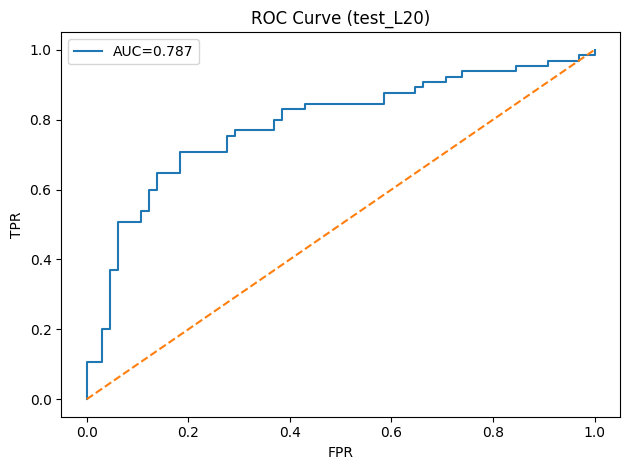

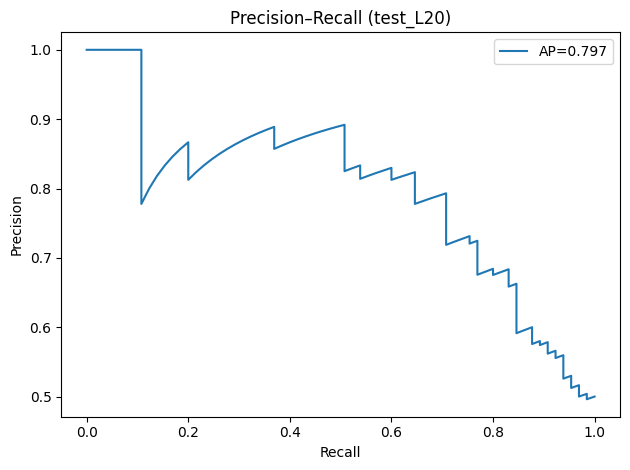

In [25]:
# === LOAD & EVALUATE LATER ===
import os, json, torch, torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader

SAVE_DIR = "probes_by_layer"   # same as above
device = "cuda"

# --- Recreate the probe class (single-logit, no sigmoid) ---
class LinearProbe(nn.Module):
    def __init__(self, hidden_dims: int):
        super().__init__()
        self.linear = nn.Linear(hidden_dims, 1)
    def forward(self, x):
        return self.linear(x).squeeze(-1)  # logits

# --- Load meta + weights ---
with open(os.path.join(SAVE_DIR, "best_probe_meta.json")) as f:
    meta = json.load(f)

best_layer = int(meta["layer"])
best_threshold = float(meta["threshold"])
hidden_size = int(meta["hidden_size"])

probe = LinearProbe(hidden_dims=hidden_size).to(device)
state = torch.load(os.path.join(SAVE_DIR, f"best_probe_layer{best_layer}.pt"), map_location=device)
probe.load_state_dict(state)
probe.eval()
print(f"Loaded probe for layer={best_layer}, threshold={best_threshold:.3f}, hidden={hidden_size}")

# --- Rebuild datasets/loaders for the chosen layer ---
# Assumes earlier cells have: tokenizer, model, probe_test_dataset (and/or val/train)
# If you only want TEST eval:
test_probe_dataset = PTSProbeDatasetFromLabels(probe_test_dataset, tokenizer, model, layer_index=best_layer)
test_loader = DataLoader(test_probe_dataset, batch_size=64, shuffle=False, collate_fn=flatten_collate)

# --- Eval helper (thresholded metrics + AUCs + confusion) ---
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score, roc_curve
)
import matplotlib.pyplot as plt

@torch.no_grad()
def evaluate_with_curves(probe, loader, threshold=0.5, device="cuda", plot=True, prefix="test"):
    # collect probs/labels
    probs, labels = [], []
    for xb, yb in loader:
        xb = xb.to(device)
        logits = probe(xb).squeeze(-1)
        p = torch.sigmoid(logits).cpu().numpy()
        probs.append(p); labels.append(yb.cpu().numpy())
    probs = np.concatenate(probs); labels = np.concatenate(labels).astype(int)
    preds = (probs >= threshold).astype(int)

    # metrics
    acc  = accuracy_score(labels, preds)
    prec = precision_score(labels, preds, zero_division=0)
    rec  = recall_score(labels, preds, zero_division=0)
    f1   = f1_score(labels, preds, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(labels, preds, labels=[0,1]).ravel()

    # AUCs (handle single-class edge cases)
    try: roc_auc = roc_auc_score(labels, probs)
    except: roc_auc = float("nan")
    try: ap = average_precision_score(labels, probs)
    except: ap = float("nan")

    print(f"[{prefix}] th={threshold:.3f} | acc={acc:.4f} prec={prec:.4f} rec={rec:.4f} f1={f1:.4f} | "
          f"ROC AUC={roc_auc:.4f} AP={ap:.4f}")
    print(f"[{prefix}] Confusion: TN={tn} FP={fp} FN={fn} TP={tp}")

    if plot:
        # ROC curve
        try:
            fpr, tpr, _ = roc_curve(labels, probs)
            plt.figure(); plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
            plt.plot([0,1],[0,1],"--"); plt.xlabel("FPR"); plt.ylabel("TPR")
            plt.title(f"ROC Curve ({prefix})"); plt.legend(); plt.tight_layout(); plt.show()
        except: pass

        # PR curve
        try:
            pr, rc, _ = precision_recall_curve(labels, probs)
            plt.figure(); plt.plot(rc, pr, label=f"AP={ap:.3f}")
            plt.xlabel("Recall"); plt.ylabel("Precision")
            plt.title(f"Precision–Recall ({prefix})"); plt.legend(); plt.tight_layout(); plt.show()
        except: pass

    return {
        "threshold": threshold, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1,
        "roc_auc": roc_auc, "ap": ap, "confusion": {"tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp)}
    }

# --- Run evaluation (at saved tuned threshold) ---
test_metrics = evaluate_with_curves(probe, test_loader, threshold=best_threshold, device=device, plot=True, prefix=f"test_L{best_layer}")


## Best Layer Confusion Matrix

Initializing dataset with 21 samples
First sample keys: ['text', 'labels', 'original_dataset_item_id']


  5%|▍         | 1/21 [00:00<00:17,  1.18it/s]

Adding label tensor with shape: torch.Size([2])


 10%|▉         | 2/21 [00:04<00:42,  2.25s/it]

Adding label tensor with shape: torch.Size([4])


 14%|█▍        | 3/21 [00:05<00:33,  1.86s/it]

Adding label tensor with shape: torch.Size([4])


 19%|█▉        | 4/21 [00:07<00:31,  1.88s/it]

Adding label tensor with shape: torch.Size([6])


 24%|██▍       | 5/21 [00:08<00:22,  1.43s/it]

Adding label tensor with shape: torch.Size([4])


 29%|██▊       | 6/21 [00:08<00:16,  1.12s/it]

Adding label tensor with shape: torch.Size([4])


 33%|███▎      | 7/21 [00:09<00:13,  1.06it/s]

Adding label tensor with shape: torch.Size([2])


 38%|███▊      | 8/21 [00:11<00:17,  1.35s/it]

Adding label tensor with shape: torch.Size([4])


 43%|████▎     | 9/21 [00:12<00:13,  1.15s/it]

Adding label tensor with shape: torch.Size([4])


 48%|████▊     | 10/21 [00:12<00:11,  1.06s/it]

Adding label tensor with shape: torch.Size([2])


 52%|█████▏    | 11/21 [00:13<00:09,  1.08it/s]

Adding label tensor with shape: torch.Size([2])


 57%|█████▋    | 12/21 [00:15<00:11,  1.29s/it]

Adding label tensor with shape: torch.Size([4])


 62%|██████▏   | 13/21 [00:17<00:11,  1.38s/it]

Adding label tensor with shape: torch.Size([22])


 67%|██████▋   | 14/21 [00:17<00:08,  1.15s/it]

Adding label tensor with shape: torch.Size([6])


 71%|███████▏  | 15/21 [00:21<00:11,  1.85s/it]

Adding label tensor with shape: torch.Size([4])


 76%|███████▌  | 16/21 [00:22<00:08,  1.72s/it]

Adding label tensor with shape: torch.Size([6])


 81%|████████  | 17/21 [00:25<00:07,  1.94s/it]

Adding label tensor with shape: torch.Size([4])


 86%|████████▌ | 18/21 [00:26<00:05,  1.84s/it]

Adding label tensor with shape: torch.Size([8])


 90%|█████████ | 19/21 [00:28<00:03,  1.77s/it]

Adding label tensor with shape: torch.Size([14])


 95%|█████████▌| 20/21 [00:28<00:01,  1.39s/it]

Adding label tensor with shape: torch.Size([8])


100%|██████████| 21/21 [00:32<00:00,  1.54s/it]

Adding label tensor with shape: torch.Size([16])


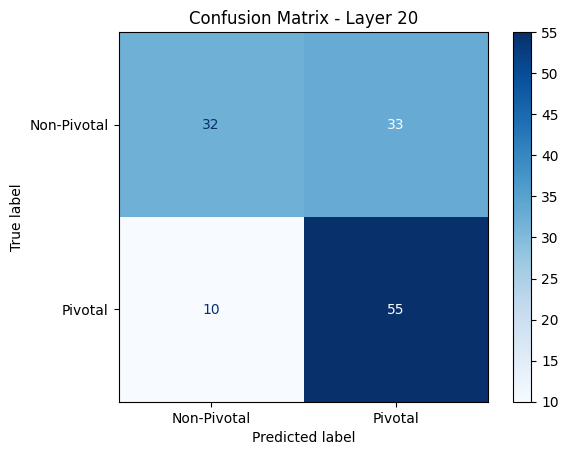

In [28]:
import json, os, torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load meta
with open(os.path.join(SAVE_DIR, "best_probe_meta.json")) as f:
    meta = json.load(f)

best_layer = int(meta["layer"])
best_threshold = float(meta["threshold"])
hidden_size = int(meta["hidden_size"])

# Load probe
probe = LinearProbe(hidden_dims=hidden_size).to(device)
state = torch.load(os.path.join(SAVE_DIR, f"best_probe_layer{best_layer}.pt"), map_location=device)
probe.load_state_dict(state)
probe.eval()

# Build test dataset/loader for best layer
test_probe_dataset = PTSProbeDatasetFromLabels(probe_test_dataset, tokenizer, model, layer_index=best_layer)
test_loader = DataLoader(test_probe_dataset, batch_size=64, shuffle=False, collate_fn=flatten_collate)

# Get predictions and confusion matrix
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        logits = probe(xb.to(device)).squeeze(-1)
        probs = torch.sigmoid(logits)
        preds = (probs >= best_threshold).long().cpu()
        y_true.extend(yb.cpu().numpy())
        y_pred.extend(preds.numpy())

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Pivotal", "Pivotal"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - Layer {best_layer}")
plt.show()


## Layer by layer Metric Visualization

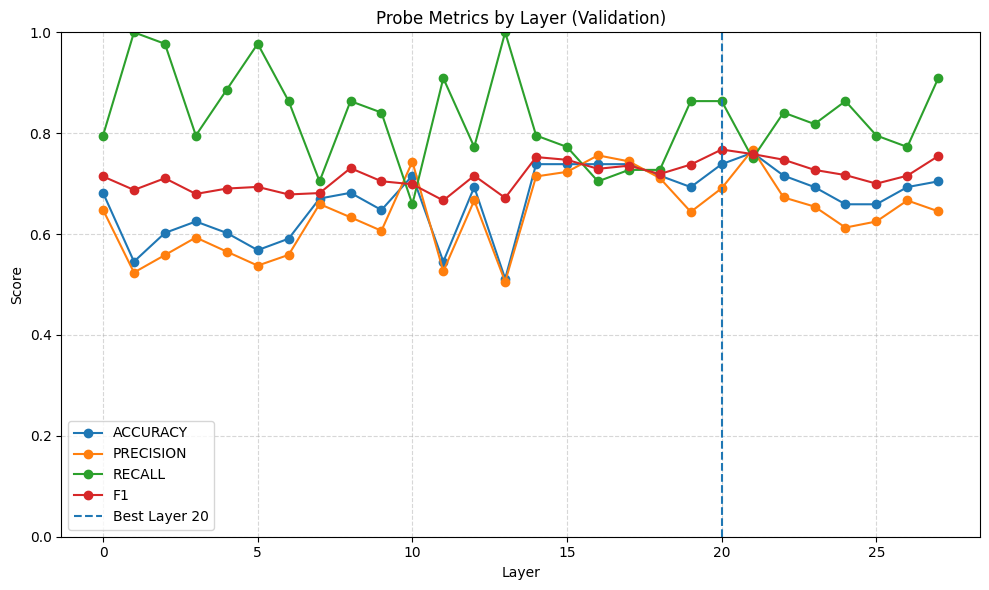

Plotted columns: ['val_accuracy', 'val_precision', 'val_recall', 'val_f1']


In [32]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt

SAVE_DIR = "probes_by_layer"  # change if needed
csv_path = os.path.join(SAVE_DIR, "layer_probe_results.csv")
meta_path = os.path.join(SAVE_DIR, "best_probe_meta.json")

# --- Load results ---
df = pd.read_csv(csv_path)
df = df.sort_values("layer").reset_index(drop=True)

# Try to read best layer (optional)
best_layer = None
if os.path.exists(meta_path):
    with open(meta_path) as f:
        meta = json.load(f)
        best_layer = int(meta.get("layer", -1))

# --- Decide which split to plot: prefer 'val_' if present, else 'test_' ---
def pick_split_prefix(columns):
    if any(c.startswith("val_") for c in columns):
        return "val_"
    elif any(c.startswith("test_") for c in columns):
        return "test_"
    return None

split = pick_split_prefix(df.columns)
if split is None:
    print("No val_/test_ metric columns found in CSV. Columns available:\n", list(df.columns))
else:
    # Metrics we’d like to plot if present
    base_metrics = ["accuracy", "precision", "recall", "f1", "roc_auc", "ap"]
    cols = [split + m for m in base_metrics if split + m in df.columns]

    if not cols:
        print(f"No {split} metrics found to plot. Columns available:\n", list(df.columns))
    else:
        plt.figure(figsize=(10, 6))
        for col in cols:
            plt.plot(df["layer"], df[col], marker="o", label=col.replace(split, "").upper())

        # mark best layer if known
        if best_layer is not None and (df["layer"] == best_layer).any():
            plt.axvline(best_layer, linestyle="--", label=f"Best Layer {best_layer}")

        plt.title(f"Probe Metrics by Layer ({'Validation' if split=='val_' else 'Test'})")
        plt.xlabel("Layer")
        plt.ylabel("Score")
        plt.ylim(0.0, 1.0)
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Quick peek if needed
        print("Plotted columns:", cols)


## Mounting google drive in Colab


In [ ]:
# Creating folders
from google.colab import drive
import os

# mount Google Drive
drive.mount('/content/drive')

# Define the base folder path
base_dir = '/content/drive/MyDrive/LLM-Probing'

# Create folders

folders = [
    'Toy',
    'PTS',
    'PTS/logs'
]

for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Created folder: {folder_path}")